### 기본 라이브러리 설정

In [1]:
# 라이브러리 정의 import tensorflow.keras
#import keras
from tensorflow import keras
#from keras import layers
import numpy as np
import pandas as pd

In [2]:
import warnings
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
warnings.filterwarnings(action="ignore")

### 1~2. 데이터 불러오기 및 분리

In [4]:
# 데이터 불러오기 및 정렬
featureData = pd.read_csv('../dataset/t1471oboccurs.csv')
sortKey = ["shcode","date","time"]

featureData = featureData.sort_values(sortKey)
featureData.head()
# 숫자형 컬럼 생성
#featureData["HOLIDAY_YN"] = np.where(featureData.HOLIDAY=="Y",1,0)
#featureData["PROMOTION_YN"] = np.where(featureData.PROMOTION=="Y",1,0)

shcode      date   time  preoffercha1  offerrem1  offerho1  bidho1  \
18999     270  20201026  90200             0       1701     46300   46250   
18998     270  20201026  90300          2769       4470     46300   46250   
18997     270  20201026  90400             0       1163     46200   46150   
18996     270  20201026  90500             0       1638     45850   45800   
18995     270  20201026  90600             0         39     45800   45750   

       bidrem1  prebidcha1  totofferrem  totbidrem  totsun  msrate  close  
18999     2325           0        15671      18704    3033  119.35  46300  
18998     1486        -839        17128      22847    5719  133.39  46250  
18997     3133           0        26369      21745   -4624   82.46  46150  
18996     1510           0        15902      19141    3239  120.37  45800  
18995     1788           0        10038      21448   11410  213.67  45750

In [5]:
# 특정 주차 기준 분리
predictStd = 150000
train_dataset = featureData[featureData.time <= predictStd]
test_dataset = featureData[featureData.time > predictStd]

# 특정 주차 기준 분리
# predictStd = 201630
# train_dataset = featureData.query('YEARWEEK <= @predictStd')
# test_dataset = featureData.query('YEARWEEK > @predictStd’)
train_dataset.head()

shcode      date   time  preoffercha1  offerrem1  offerho1  bidho1  \
18999     270  20201026  90200             0       1701     46300   46250   
18998     270  20201026  90300          2769       4470     46300   46250   
18997     270  20201026  90400             0       1163     46200   46150   
18996     270  20201026  90500             0       1638     45850   45800   
18995     270  20201026  90600             0         39     45800   45750   

       bidrem1  prebidcha1  totofferrem  totbidrem  totsun  msrate  close  
18999     2325           0        15671      18704    3033  119.35  46300  
18998     1486        -839        17128      22847    5719  133.39  46250  
18997     3133           0        26369      21745   -4624   82.46  46150  
18996     1510           0        15902      19141    3239  120.37  45800  
18995     1788           0        10038      21448   11410  213.67  45750

In [6]:
# 인덱스 초기화
train_dataset = train_dataset.reset_index(drop=True)
test_dataset = test_dataset.reset_index(drop=True)

# 답지 별도 분리
train_labels = train_dataset["close"]
test_labels = test_dataset["close"]
train_dataset.head()

shcode      date   time  preoffercha1  offerrem1  offerho1  bidho1  \
0     270  20201026  90200             0       1701     46300   46250   
1     270  20201026  90300          2769       4470     46300   46250   
2     270  20201026  90400             0       1163     46200   46150   
3     270  20201026  90500             0       1638     45850   45800   
4     270  20201026  90600             0         39     45800   45750   

   bidrem1  prebidcha1  totofferrem  totbidrem  totsun  msrate  close  
0     2325           0        15671      18704    3033  119.35  46300  
1     1486        -839        17128      22847    5719  133.39  46250  
2     3133           0        26369      21745   -4624   82.46  46150  
3     1510           0        15902      19141    3239  120.37  45800  
4     1788           0        10038      21448   11410  213.67  45750

In [7]:
test_dataset.head()

shcode      date    time  preoffercha1  offerrem1  offerho1  bidho1  \
0     270  20201026  150100          -226       6663     48000   47950   
1     270  20201026  150200             0       2282     47950   47900   
2     270  20201026  150300             0        223     47900   47850   
3     270  20201026  150400             0       2884     47950   47900   
4     270  20201026  150500         -1468       1416     47950   47900   

   bidrem1  prebidcha1  totofferrem  totbidrem  totsun  msrate  close  
0     2153         985        83451      26868  -56583   32.20  48000  
1     4749           0        82731      29585  -53146   35.76  47950  
2     4519           0        76087      30750  -45337   40.41  47900  
3     3584           0        84405      29949  -54456   35.48  47950  
4     2454       -1130        86162      29350  -56812   34.06  47950

In [8]:
train_dataset.columns

Index(['shcode', 'date', 'time', 'preoffercha1', 'offerrem1', 'offerho1',
       'bidho1', 'bidrem1', 'prebidcha1', 'totofferrem', 'totbidrem', 'totsun',
       'msrate', 'close'],
      dtype='object')

In [9]:
# feature / label 선정 다른 풀이
# label = ["QTY"]
# features = list(featuresData.select_dtypes(np.number).columns)
# features = list(set(features)-set(label))

In [10]:
features  = ["offerrem1","offerho1","bidrem1","bidho1"]
label = ['close']

In [11]:
trainingData_features = train_dataset[features]
trainingData_label = train_dataset[label]
testData_features = test_dataset[features]
testData_label = test_dataset[label]
testData_all = test_dataset

In [12]:
#len(features)
trainingData_features.head()

offerrem1  offerho1  bidrem1  bidho1
0       1701     46300     2325   46250
1       4470     46300     1486   46250
2       1163     46200     3133   46150
3       1638     45850     1510   45800
4         39     45800     1788   45750

### 3. 모델 생성

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [14]:
trainingData_features.shape
#print(len(features))

(26207, 4)

In [15]:
model = Sequential()
### 4개의 feature 가 행으로 입력됨
model.add(Dense(8, activation='relu', input_shape=(len(features),)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

### 4. 모델 컴파일

In [16]:
#optimizer = keras.optimizers.RMSprop(0.001)
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error','mean_squared_error'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


### 5. 모델 훈련

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
#더이상 에러율이 향상되지 않을 시 정지한다, 단 patience 옵션 유지(너무빨리 끝나는거 방지)
early_stopping_monitor = EarlyStopping(patience=500)
EPOCHS = 100
#모델 훈련 (훈련/검증을 80%, 20%로 나눔)
history =model.fit(trainingData_features,
                   trainingData_label, 
                   validation_split=0.2, epochs= EPOCHS, callbacks=[early_stopping_monitor])




Train on 20965 samples, validate on 5242 samples
Epoch 1/100
20965/20965 [==============================] - 1s 67us/sample - loss: 483807736.8127 - mean_absolute_error: 11718.9600 - mean_squared_error: 483807360.0000 - val_loss: 64443657.2118 - val_mean_absolute_error: 3201.6089 - val_mean_squared_error: 64443660.0000
Epoch 2/100
20965/20965 [==============================] - 1s 42us/sample - loss: 3928040.3521 - mean_absolute_error: 646.4622 - mean_squared_error: 3928038.7500 - val_loss: 4002350.8894 - val_mean_absolute_error: 828.0416 - val_mean_squared_error: 4002352.2500
Epoch 3/100
20965/20965 [==============================] - 1s 43us/sample - loss: 619919.0776 - mean_absolute_error: 274.3702 - mean_squared_error: 619919.1250 - val_loss: 835481.9178 - val_mean_absolute_error: 421.3391 - val_mean_squared_error: 835481.9375
Epoch 4/100
20965/20965 [==============================] - 1s 43us/sample - loss: 231490.8469 - mean_absolute_error: 190.3792 - mean_squared_error: 231490.9844 

20965/20965 [==============================] - 1s 45us/sample - loss: 50955.2093 - mean_absolute_error: 74.9393 - mean_squared_error: 50955.2383 - val_loss: 780749.3764 - val_mean_absolute_error: 377.8593 - val_mean_squared_error: 780749.3750
Epoch 33/100
20965/20965 [==============================] - 1s 48us/sample - loss: 44589.3481 - mean_absolute_error: 47.1407 - mean_squared_error: 44589.3633 - val_loss: 1553.2507 - val_mean_absolute_error: 22.3675 - val_mean_squared_error: 1553.2504
Epoch 34/100
20965/20965 [==============================] - 1s 46us/sample - loss: 24074.0969 - mean_absolute_error: 54.8248 - mean_squared_error: 24074.0996 - val_loss: 18111.4728 - val_mean_absolute_error: 59.0584 - val_mean_squared_error: 18111.4746
Epoch 35/100
20965/20965 [==============================] - 1s 56us/sample - loss: 258848.6468 - mean_absolute_error: 134.8915 - mean_squared_error: 258848.7656 - val_loss: 853.8768 - val_mean_absolute_error: 14.5775 - val_mean_squared_error: 853.8764
E

20965/20965 [==============================] - 1s 55us/sample - loss: 110270.3413 - mean_absolute_error: 99.8484 - mean_squared_error: 110270.2969 - val_loss: 1661.8236 - val_mean_absolute_error: 18.6961 - val_mean_squared_error: 1661.8235
Epoch 65/100
20965/20965 [==============================] - 1s 60us/sample - loss: 14048.2564 - mean_absolute_error: 36.6682 - mean_squared_error: 14048.2686 - val_loss: 416.9020 - val_mean_absolute_error: 12.0622 - val_mean_squared_error: 416.9020
Epoch 66/100
20965/20965 [==============================] - 1s 48us/sample - loss: 15724.5987 - mean_absolute_error: 44.1024 - mean_squared_error: 15724.5996 - val_loss: 11128.5122 - val_mean_absolute_error: 45.1792 - val_mean_squared_error: 11128.5117
Epoch 67/100
20965/20965 [==============================] - 1s 47us/sample - loss: 61939.6633 - mean_absolute_error: 64.2590 - mean_squared_error: 61939.7031 - val_loss: 1612.0665 - val_mean_absolute_error: 21.6719 - val_mean_squared_error: 1612.0664
Epoch 6

20965/20965 [==============================] - 1s 42us/sample - loss: 9375.7314 - mean_absolute_error: 34.4902 - mean_squared_error: 9375.7314 - val_loss: 50091.4384 - val_mean_absolute_error: 90.3970 - val_mean_squared_error: 50091.4492
Epoch 97/100
20965/20965 [==============================] - 1s 43us/sample - loss: 22903.2135 - mean_absolute_error: 54.4471 - mean_squared_error: 22903.2207 - val_loss: 22443.1395 - val_mean_absolute_error: 62.9541 - val_mean_squared_error: 22443.1387
Epoch 98/100
20965/20965 [==============================] - 1s 43us/sample - loss: 12616.8643 - mean_absolute_error: 41.4826 - mean_squared_error: 12616.8652 - val_loss: 40293.3630 - val_mean_absolute_error: 97.9227 - val_mean_squared_error: 40293.3672
Epoch 99/100
20965/20965 [==============================] - 1s 43us/sample - loss: 48570.9029 - mean_absolute_error: 66.2292 - mean_squared_error: 48570.8867 - val_loss: 1036.1637 - val_mean_absolute_error: 17.2599 - val_mean_squared_error: 1036.1639
Epoch

In [18]:
# callbacks = [
#     EarlyStopping(patience=50),
#     TensorBoard(log_dir = "./logs_t{}".format(currentdate), write_graph=True, write_images=True),
#     ModelCheckpoint(filepath="./logs_w/testlinear.h5", monitor="val_acc", save_best_only=True)
# ]

# history = model.fit(trainingData_features,
#                    trainingData_label,
#                    validation_split=0.2,
#                    epochs=1000,
#                    callbacks=callbacks)

### 모델 학습 결과 모니터링

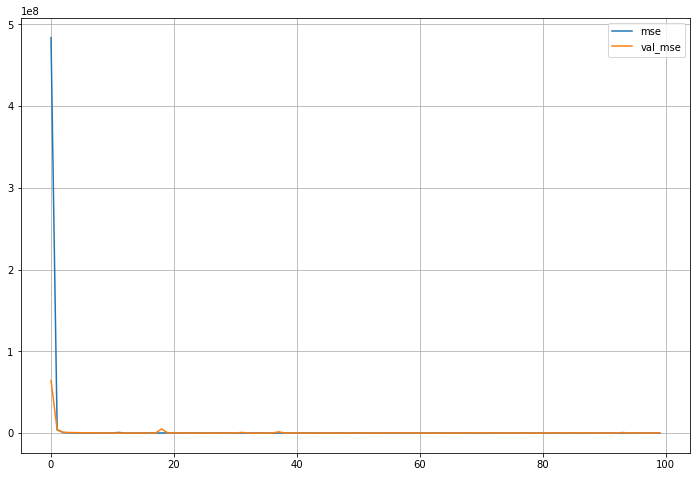

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
# 훈련 데이터의 mse
plt.plot(history.history['mean_squared_error'])
# 검증 데이터의 mse
plt.plot(history.history['val_mean_squared_error'])
plt.legend(['mse','val_mse'])
plt.grid()
plt.show()


In [20]:
pd.DataFrame(history.history)

loss  mean_absolute_error  mean_squared_error      val_loss  \
0   4.838077e+08         11718.959961        4.838074e+08  6.444366e+07   
1   3.928040e+06           646.462219        3.928039e+06  4.002351e+06   
2   6.199191e+05           274.370209        6.199191e+05  8.354819e+05   
3   2.314908e+05           190.379196        2.314910e+05  6.195638e+05   
4   1.765734e+05           161.431976        1.765734e+05  4.802478e+05   
..           ...                  ...                 ...           ...   
95  9.375731e+03            34.490223        9.375731e+03  5.009144e+04   
96  2.290321e+04            54.447102        2.290322e+04  2.244314e+04   
97  1.261686e+04            41.482647        1.261687e+04  4.029336e+04   
98  4.857090e+04            66.229156        4.857089e+04  1.036164e+03   
99  8.712361e+03            34.425282        8.712363e+03  3.501027e+05   

    val_mean_absolute_error  val_mean_squared_error  
0               3201.608887            6.444366e+07  
1                828.041565            4.002352e+06  
2                421.339142            8.354819e+05  
3                336.157715            6.195637e+05  
4                312.580627            4.802479e+05  
..                      ...                     ...  
95                90.397049            5.009145e+04  
96                62.954128            2.244314e+04  
97                97.922707            4.029337e+04  
98                17.259926            1.036164e+03  
99               222.691772            3.501027e+05  

[100 rows x 6 columns]

### 6. 모델 추론

In [21]:
loss, mae, mse = model.evaluate(testData_features, testData_label, verbose=0)

In [22]:
model.evaluate(testData_features, testData_label, verbose=0)

[176294.33509235916, 127.467834, 176294.33]

In [23]:
np.sqrt(mse)

419.87418

### 7. 예측

In [24]:
test_predictions = model.predict(testData_features).flatten()
test_predictions

array([47946.45  , 47890.57  , 47817.99  , ...,  5086.827 ,  5116.491 ,
        5103.1304], dtype=float32)

In [25]:
# 예측결과 별도 데이터프레임 생성
predictValues = pd.DataFrame(list(test_predictions), columns = ["PREDICT"])

# 예측결과 컬럼 생성
finalResult = pd.concat([testData_all,predictValues],axis=1)
finalResult.head()

shcode      date    time  preoffercha1  offerrem1  offerho1  bidho1  \
0     270  20201026  150100          -226       6663     48000   47950   
1     270  20201026  150200             0       2282     47950   47900   
2     270  20201026  150300             0        223     47900   47850   
3     270  20201026  150400             0       2884     47950   47900   
4     270  20201026  150500         -1468       1416     47950   47900   

   bidrem1  prebidcha1  totofferrem  totbidrem  totsun  msrate  close  \
0     2153         985        83451      26868  -56583   32.20  48000   
1     4749           0        82731      29585  -53146   35.76  47950   
2     4519           0        76087      30750  -45337   40.41  47900   
3     3584           0        84405      29949  -54456   35.48  47950   
4     2454       -1130        86162      29350  -56812   34.06  47950   

        PREDICT  
0  47946.449219  
1  47890.570312  
2  47817.988281  
3  47893.273438  
4  47876.085938

### 8. 예측결과 비교 (시각화)

In [26]:
#finalResult = finalResult[finalResult.YEARWEEK <= 201652]

import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
#finalResult.loc[0]
tempCodes = finalResult.drop_duplicates(['shcode'])
tempCodes

shcode      date    time  preoffercha1  offerrem1  offerho1  bidho1  \
0        270  20201026  150100          -226       6663     48000   47950   
21       370  20201026  150100             0        321      3000    2995   
42       490  20201025  150100            69        449      7320    7290   
63       660  20201025  150100          2900      43808     84500   84400   
84      1450  20201026  150100           698        918     26150   26100   
...      ...       ...     ...           ...        ...       ...     ...   
1428  252710  20201026  150100         49190      49295      4215    4210   
1449  261220  20201025  150100        -49900     169250      6235    6225   
1470  316140  20201025  150100             0      23826      9220    9210   
1491  330590  20201026  150100         -3428       3386      5440    5430   
1512  350520  20201026  150100          -100      11514      5050    5040   

      bidrem1  prebidcha1  totofferrem  totbidrem  totsun  msrate  close  \
0        2153         985        83451      26868  -56583   32.20  48000   
21       3120          20        95885      27437  -68448   28.61   3000   
42        485        -305        39062      36396   -2666   93.17   7320   
63      11484       -3351       261749      65890 -195859   25.17  84400   
84       3172         -40        41364      14375  -26989   34.75  26150   
...       ...         ...          ...        ...     ...     ...    ...   
1428    23523      -20000       366416     231853 -134563   63.28   4215   
1449   218443       -1306       587177     641400   54223  109.23   6225   
1470     7662           0       282717     108804 -173913   38.49   9220   
1491     4029        2277        82142     120030   37888  146.13   5430   
1512     5387           0        63280      41459  -21821   65.52   5050   

           PREDICT  
0     47946.449219  
21     2991.138184  
42     7300.134766  
63    84391.601562  
84    26104.367188  
...            ...  
1428   4179.548828  
1449   5777.459473  
1470   9201.843750  
1491   5426.206543  
1512   5035.613770  

[70 rows x 15 columns]

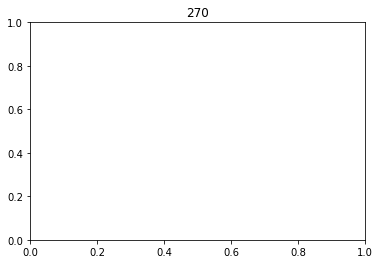

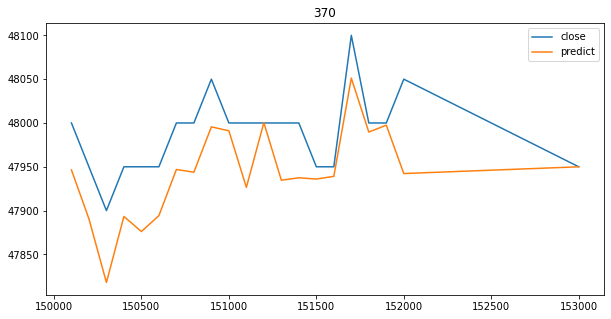

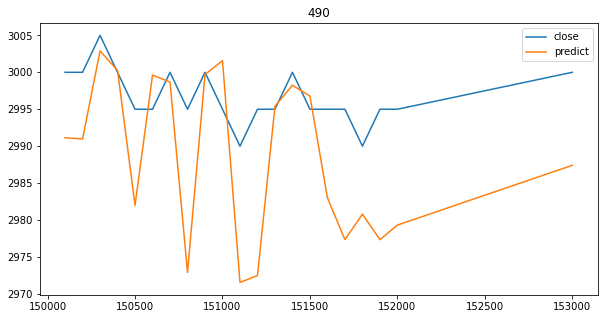

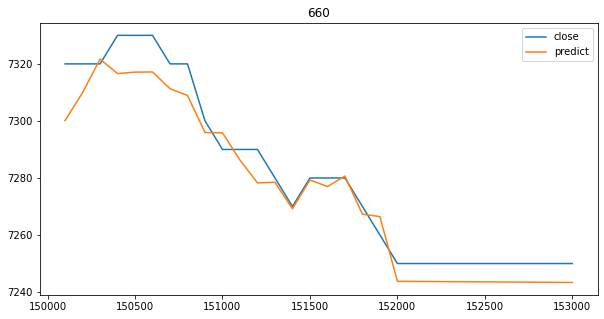

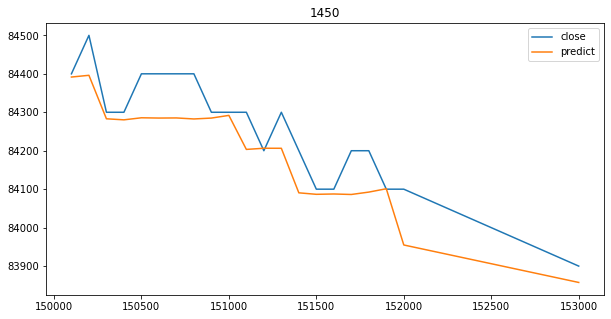

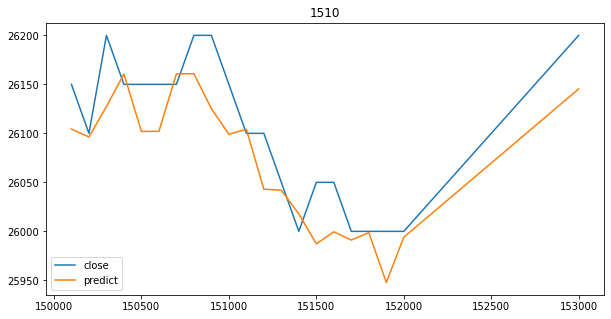

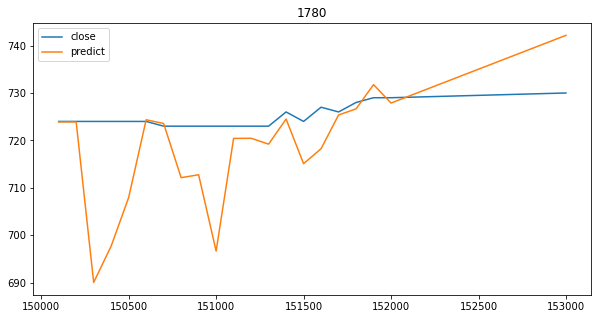

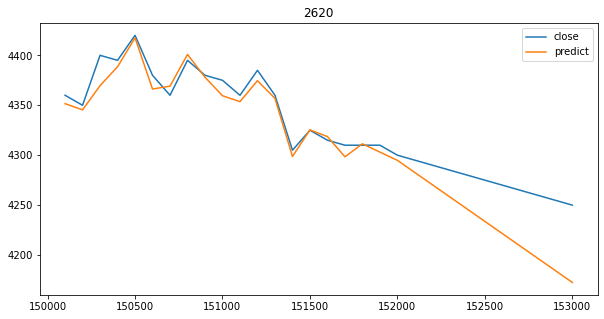

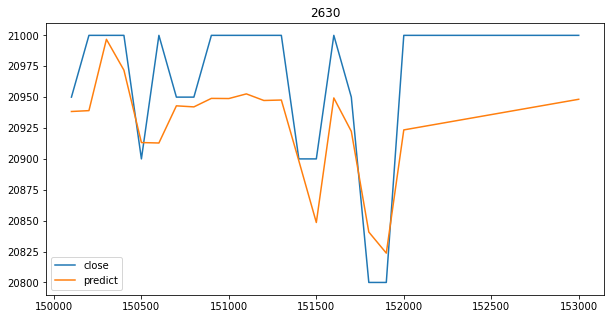

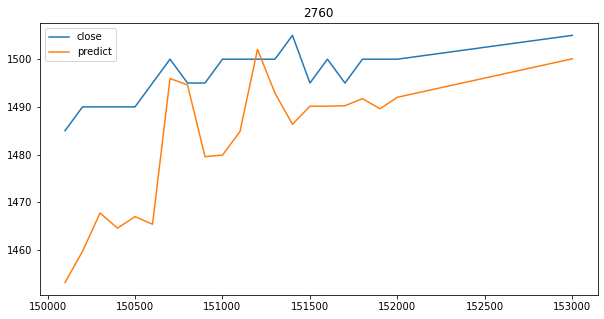

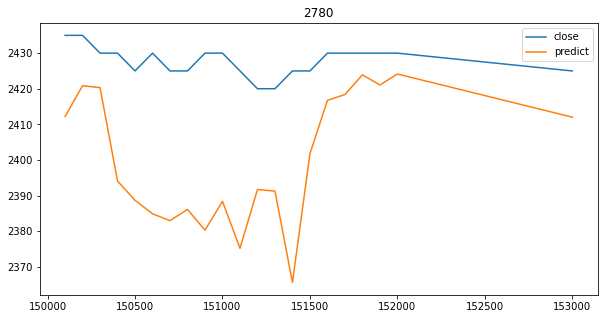

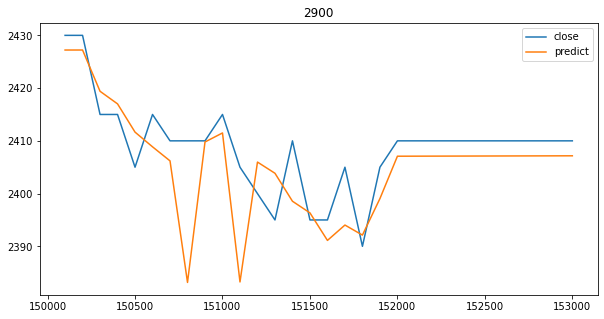

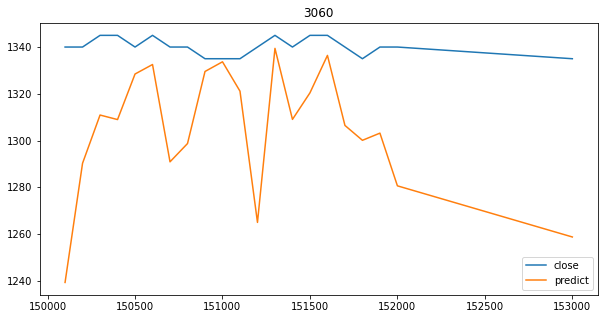

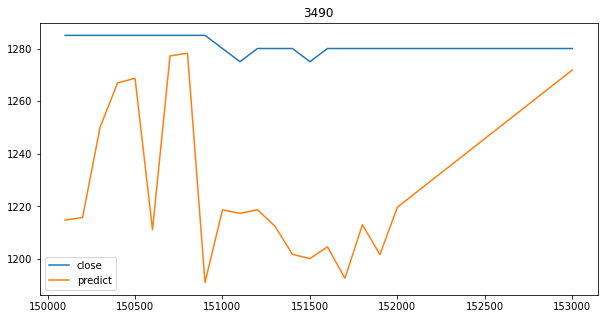

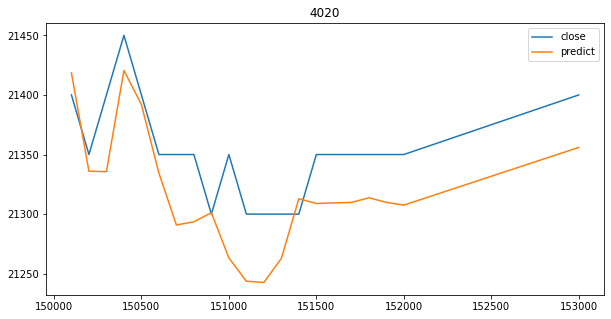

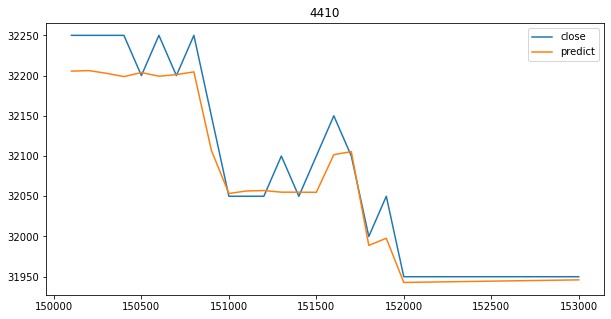

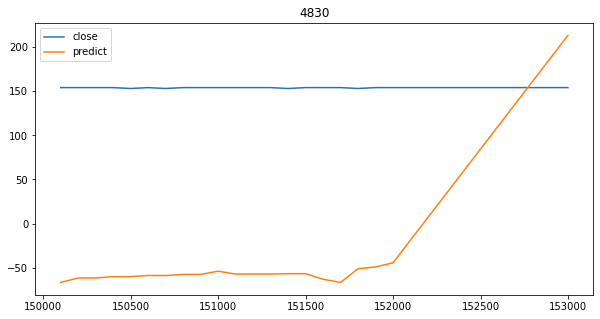

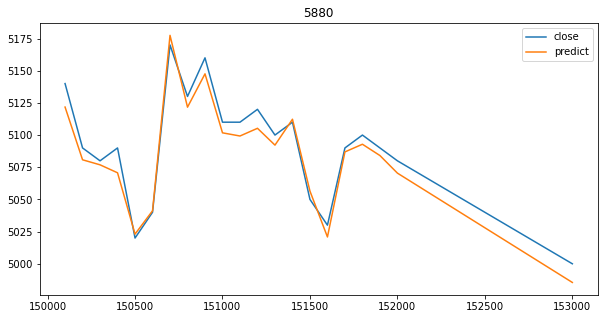

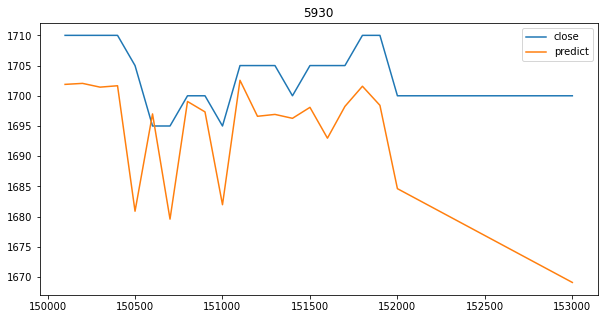

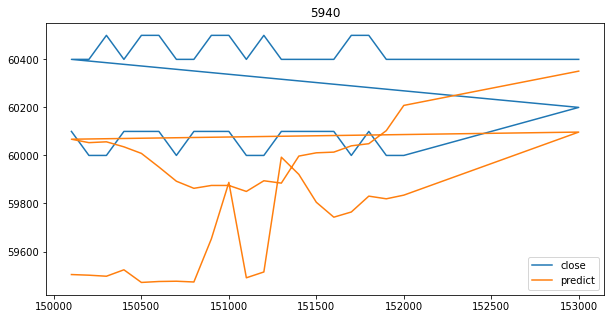

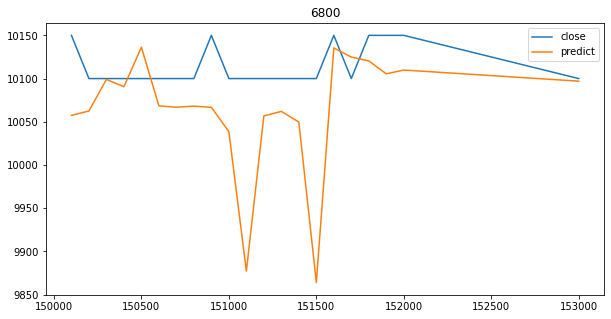

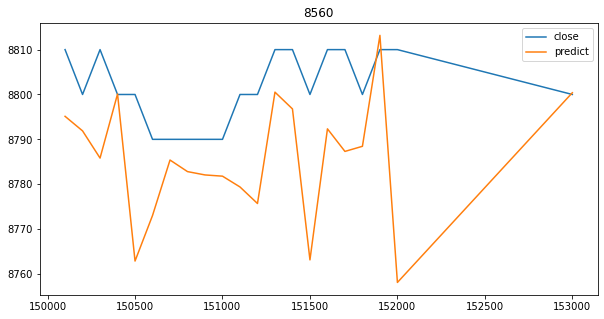

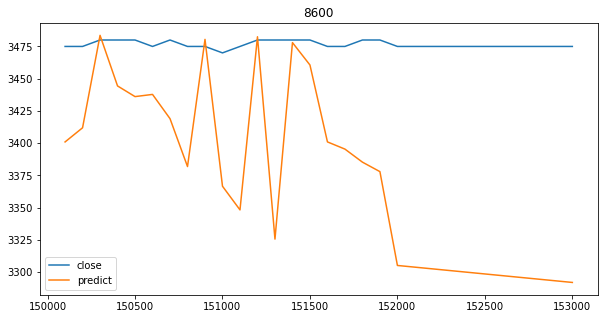

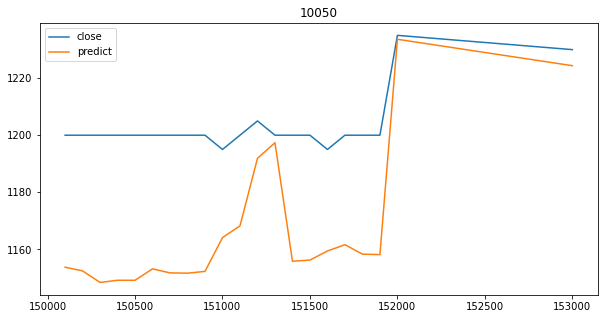

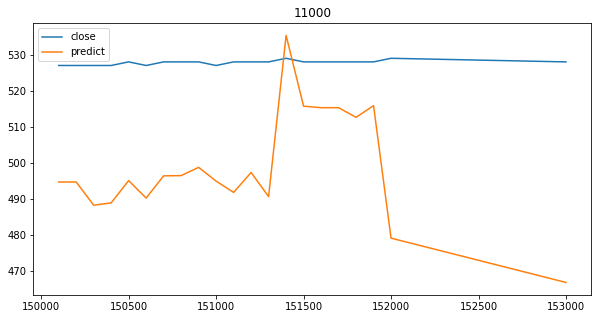

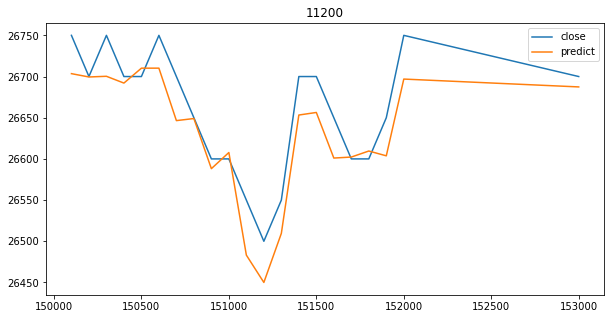

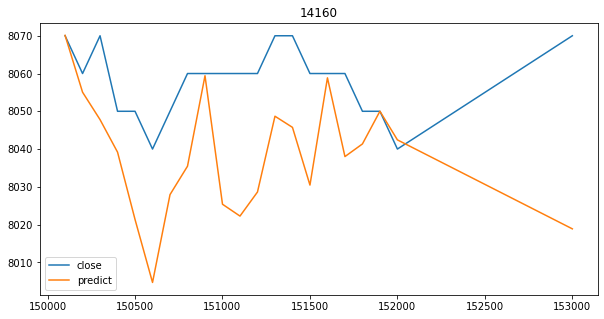

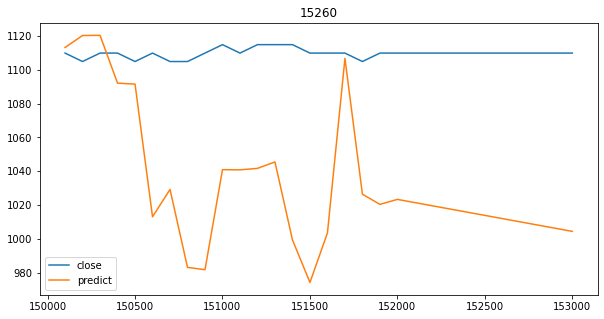

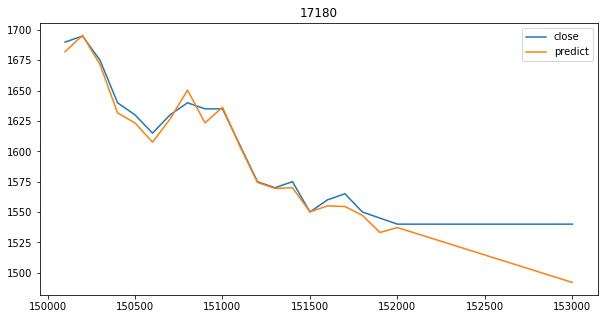

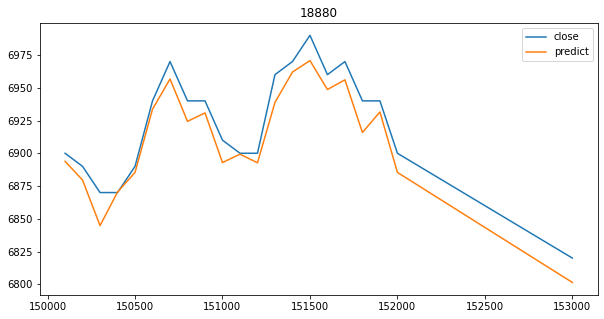

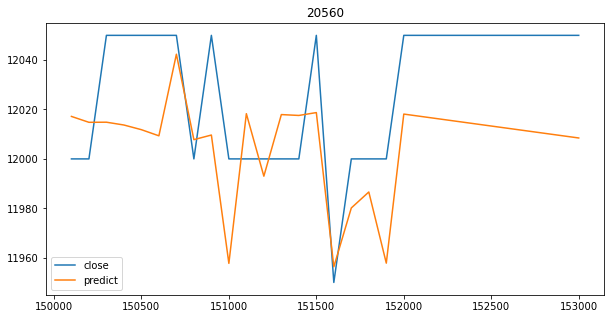

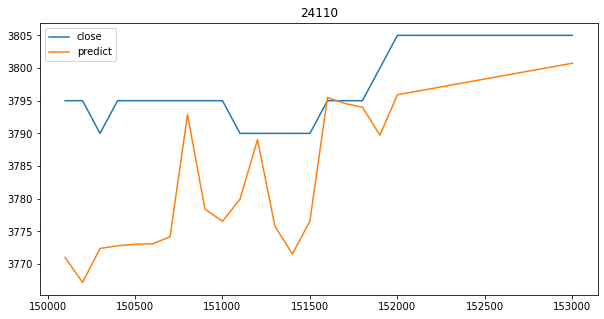

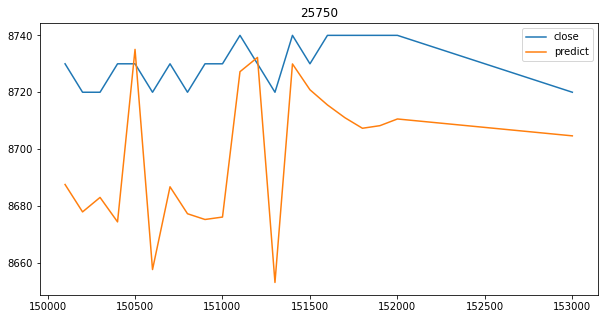

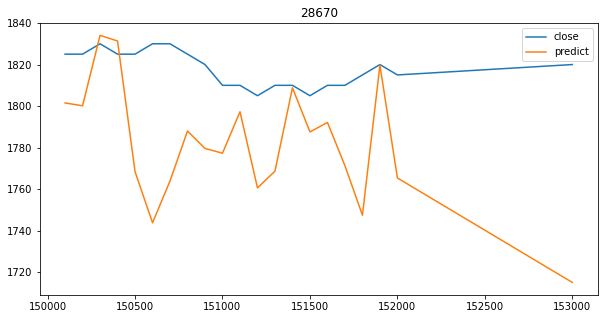

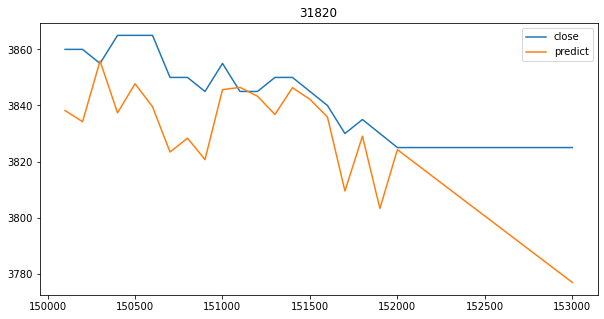

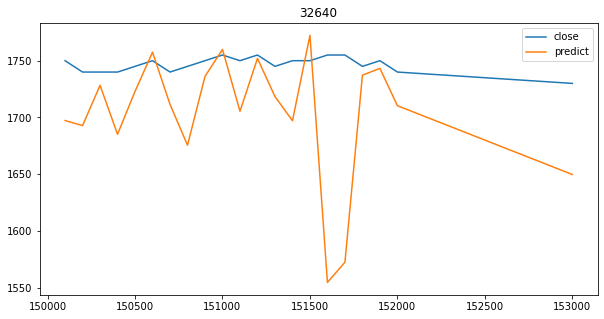

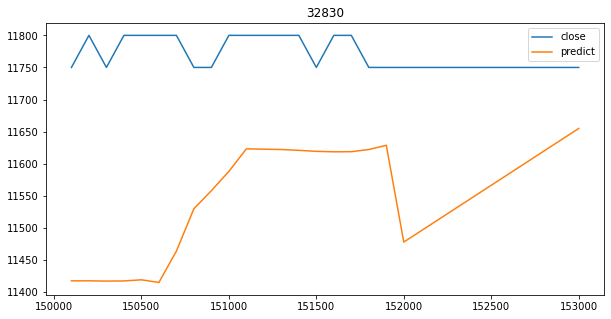

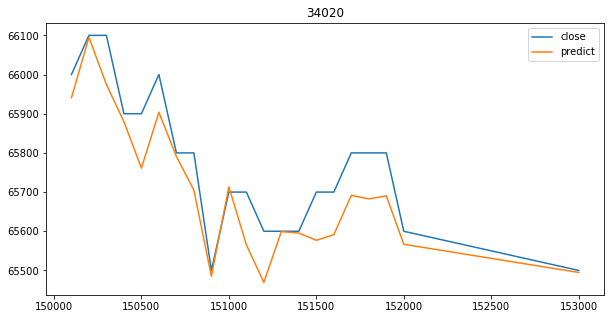

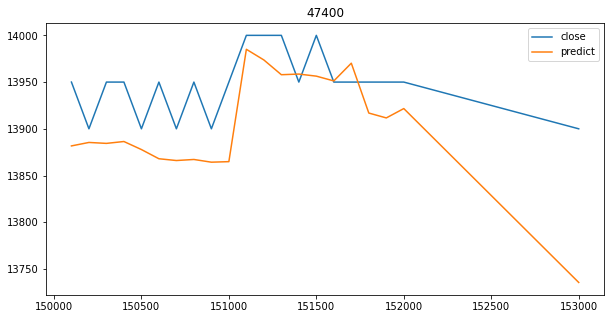

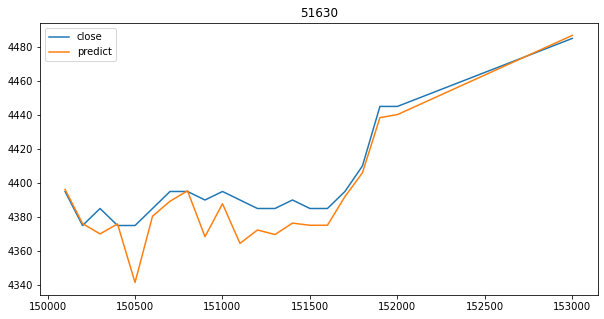

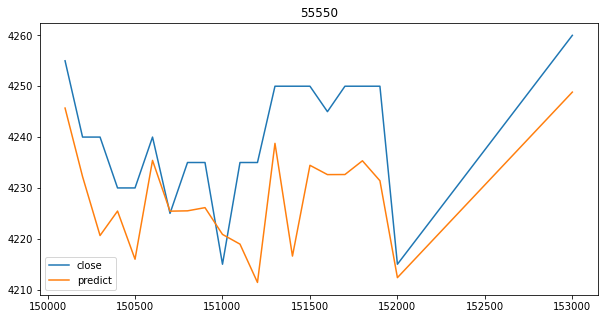

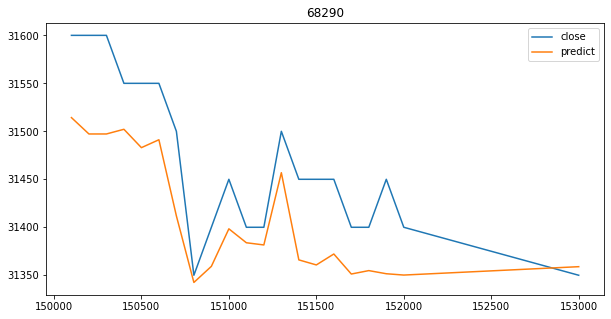

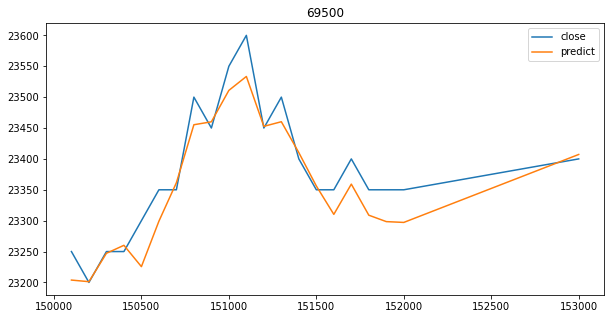

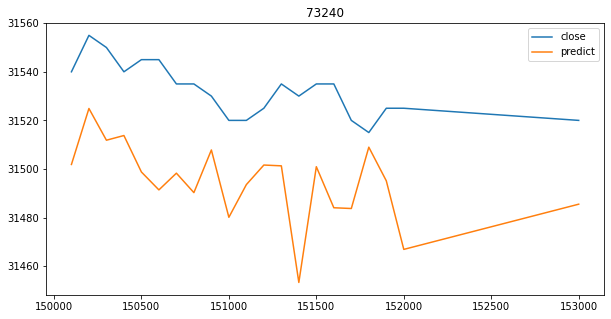

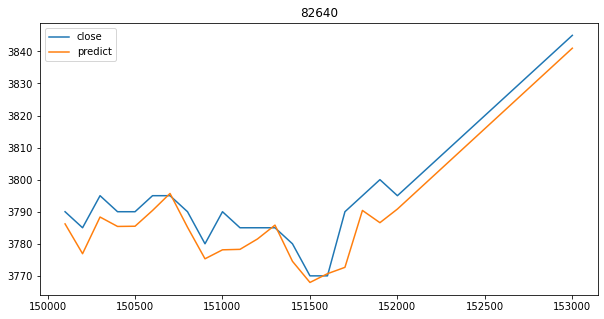

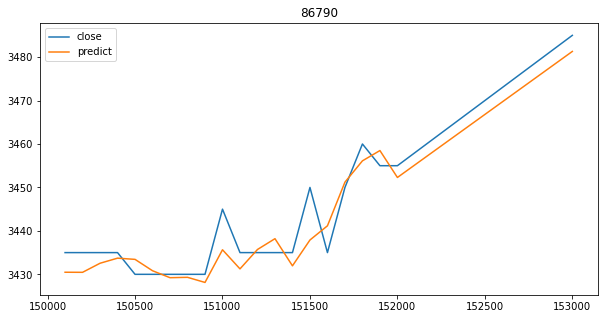

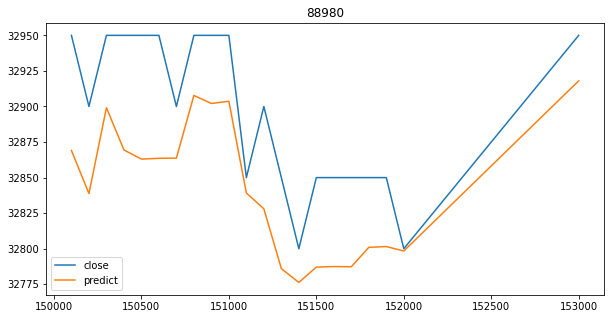

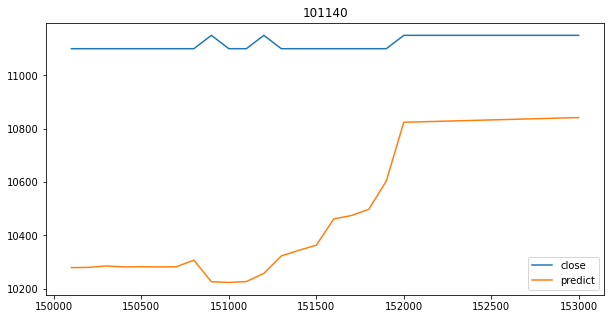

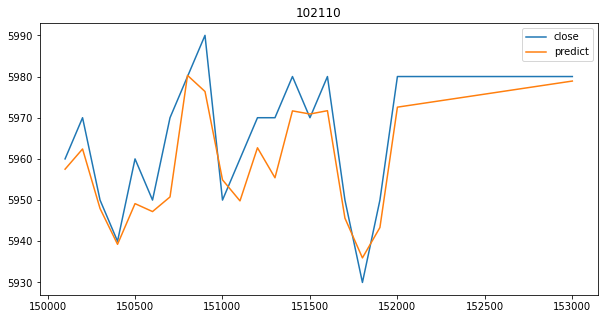

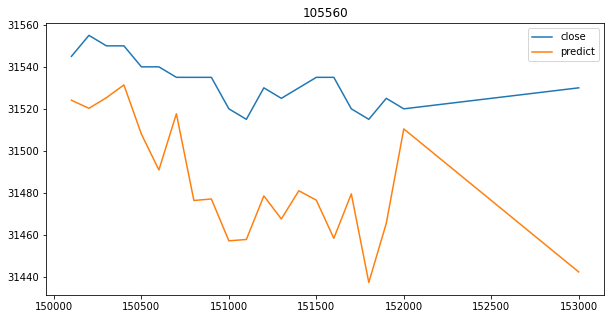

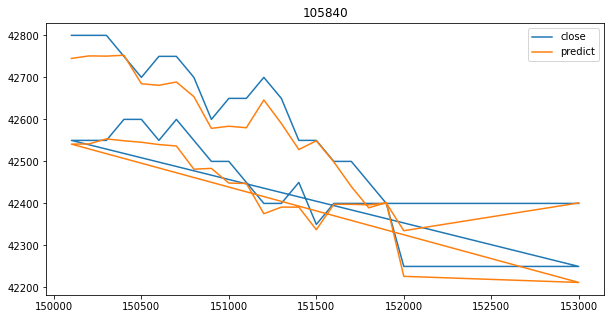

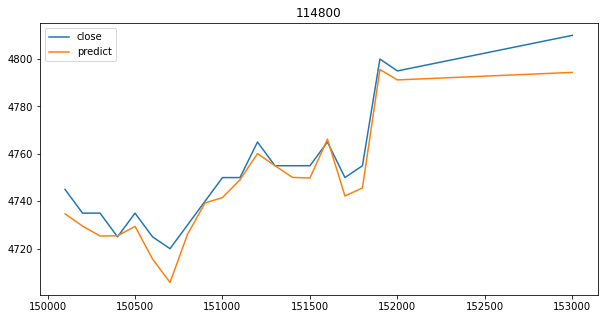

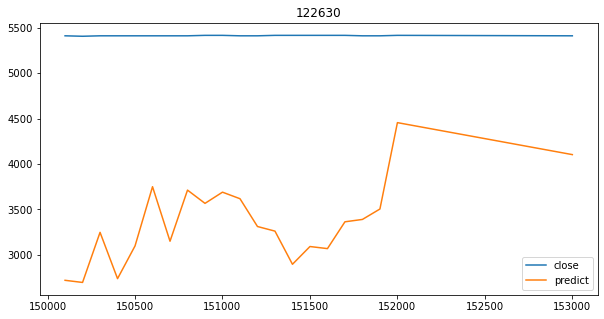

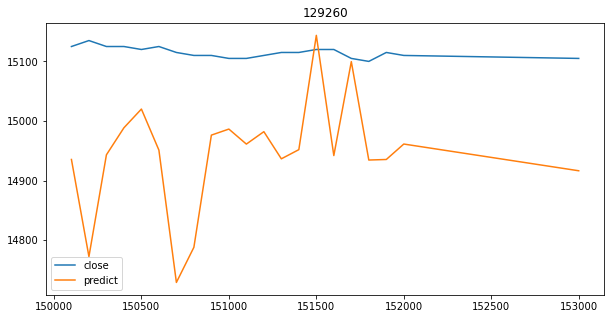

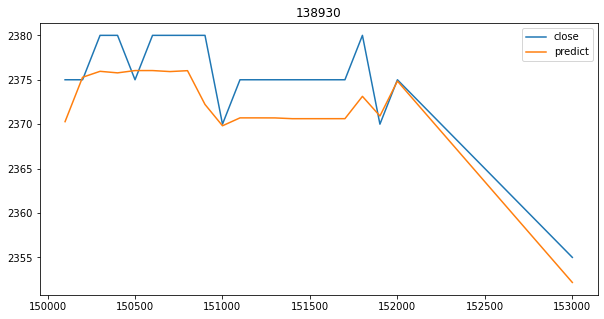

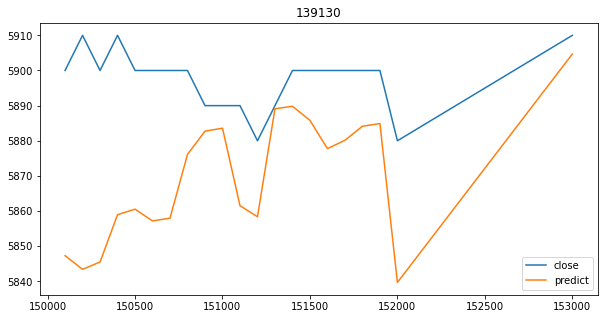

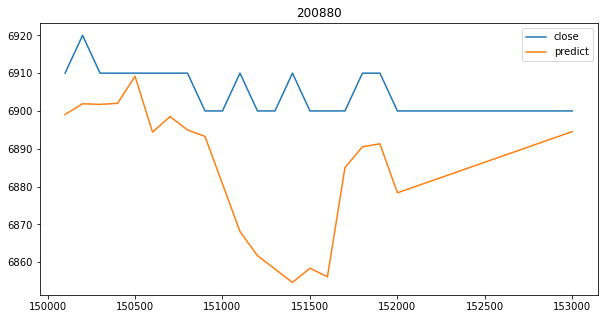

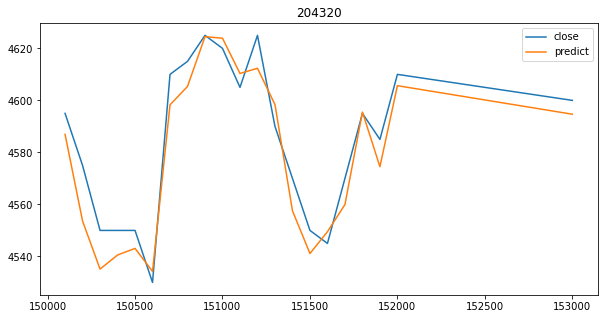

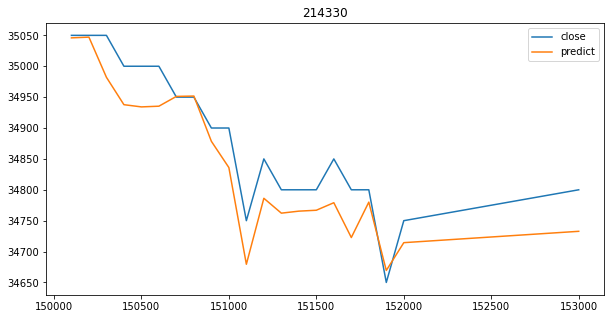

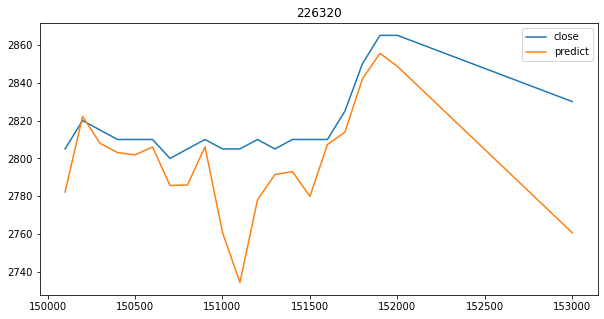

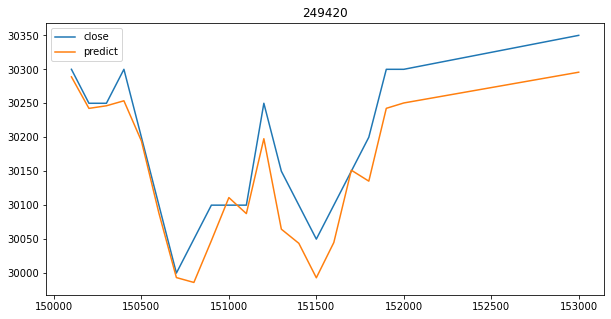

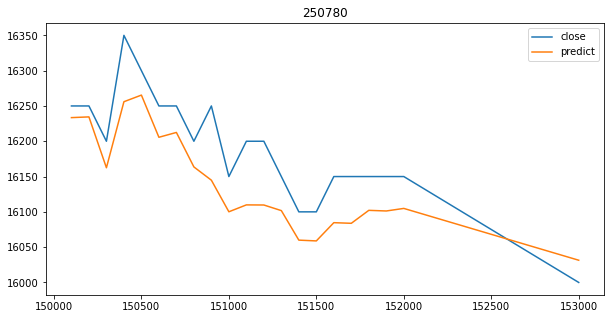

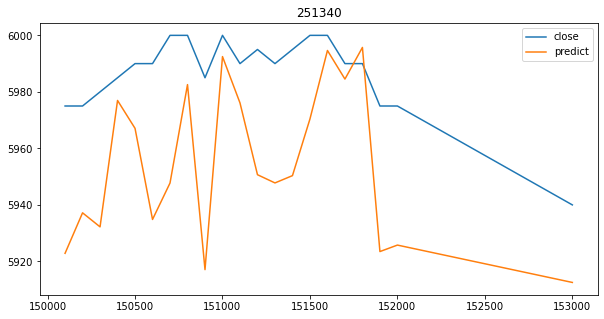

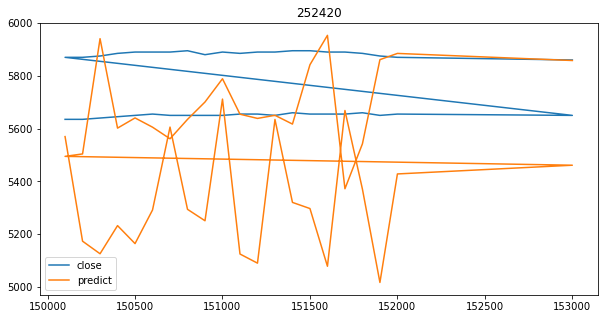

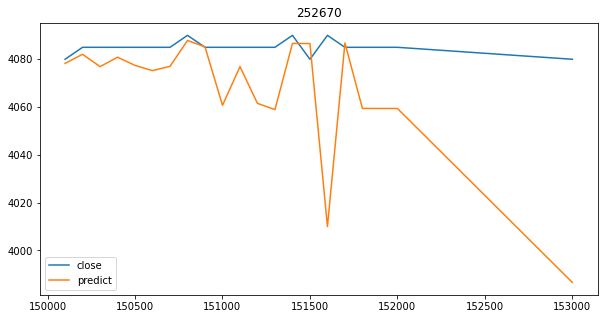

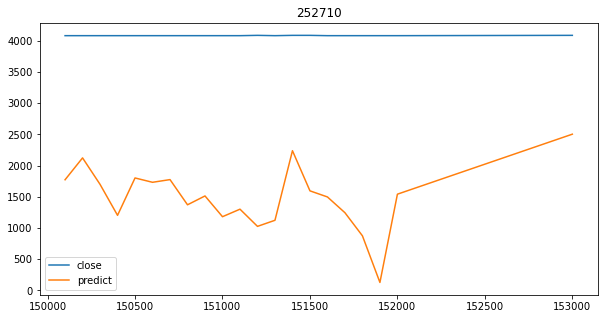

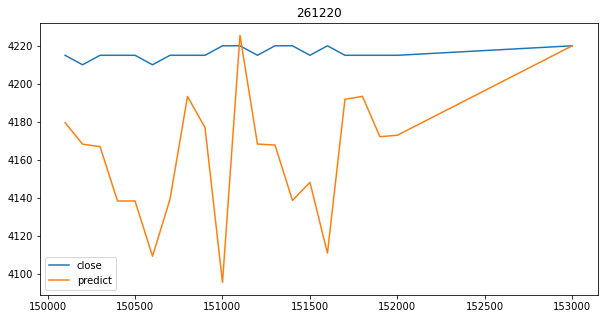

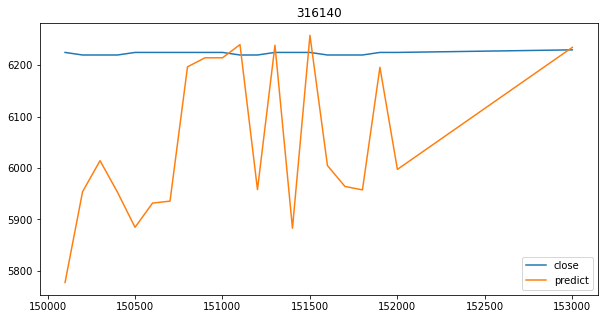

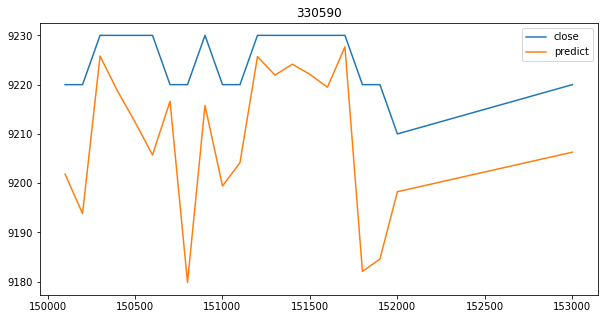

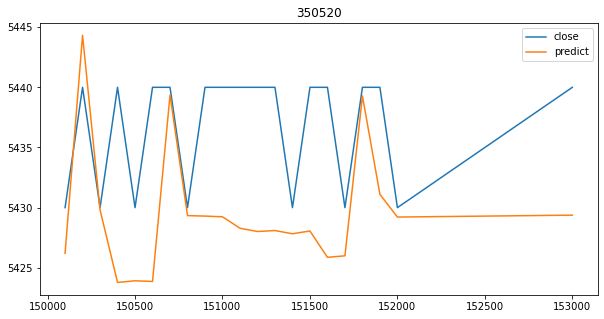

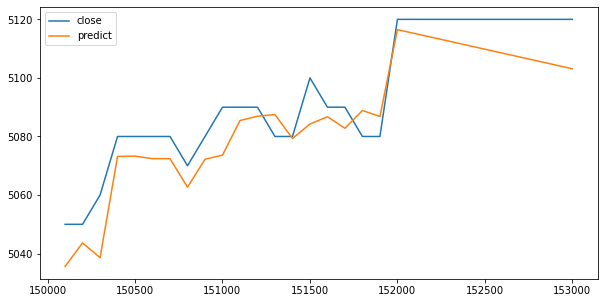

In [28]:
for code in tempCodes['shcode']:
    #print(code)
    plt.title(code)
    plt.figure(figsize=(10,5))
    plt.plot(finalResult.time[finalResult.shcode == code], finalResult.close[finalResult.shcode == code], label = "close")
    plt.plot(finalResult.time[finalResult.shcode == code], finalResult.PREDICT[finalResult.shcode == code], label = "predict")
    plt.legend(loc=0)

In [52]:
# plt.figure(figsize=(10,5))
# plt.plot(finalResult.time[finalResult.shcode == 11200], finalResult.close[finalResult.shcode == 11200], label = "close")
# plt.plot(finalResult.time[finalResult.shcode == 11200], finalResult.PREDICT[finalResult.shcode == 11200], label = "predict")
# plt.legend(loc=0)

### 모델 저장 및 재학습

In [53]:
# 모델 저장
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("linear_keras_sellout.h5")

In [54]:
model.save("linear_keras_sellout2.h5")

In [55]:
from tensorflow.keras.models import model_from_json 
json_file = open("model.json", "r") 
loaded_model_json = json_file.read() 
json_file.close() 

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("linear_keras_sellout.h5") 

In [56]:
#모델 재 컴파일
optimizer= keras.optimizers.Adam()

loaded_model.compile(loss='mean_squared_error',
                     optimizer=optimizer,
                     metrics=['mean_absolute_error','mean_squared_error'])
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [57]:

from tensorflow.keras.callbacks import EarlyStopping
#더이상 에러율이 향상되지 않을 시 정지한다, 단 patience 옵션 유지(너무빨리 끝나는거 방지)
early_stopping_monitor = EarlyStopping(patience=50)
EPOCHS = 10
#모델 훈련 (훈련/검증을 80%, 20%로 나눔)
history =loaded_model.fit(trainingData_features,
                   trainingData_label, 
                   validation_split=0.2, epochs= EPOCHS, callbacks=[early_stopping_monitor])

Train on 20965 samples, validate on 5242 samples
Epoch 1/10
20965/20965 [==============================] - 1s 57us/sample - loss: 6435.5199 - mean_absolute_error: 26.7689 - mean_squared_error: 6435.5229 - val_loss: 5898.8363 - val_mean_absolute_error: 27.3588 - val_mean_squared_error: 5898.8350
Epoch 2/10
20965/20965 [==============================] - 1s 39us/sample - loss: 13425.4886 - mean_absolute_error: 35.4266 - mean_squared_error: 13425.4932 - val_loss: 1148.6940 - val_mean_absolute_error: 20.1330 - val_mean_squared_error: 1148.6937
Epoch 3/10
20965/20965 [==============================] - 1s 40us/sample - loss: 10607.0486 - mean_absolute_error: 27.7519 - mean_squared_error: 10607.0479 - val_loss: 100667.1486 - val_mean_absolute_error: 133.3911 - val_mean_squared_error: 100667.1250
Epoch 4/10
20965/20965 [==============================] - 1s 39us/sample - loss: 6186.4266 - mean_absolute_error: 25.4867 - mean_squared_error: 6186.4258 - val_loss: 727.0249 - val_mean_absolute_error:

In [58]:
test_predictions = model.predict(testData_features).flatten()

# 예측결과 별도 데이터프레임 생성
predictValues = pd.DataFrame(list(test_predictions), columns = ["PREDICT"])

# 예측결과 컬럼 생성
finalResult = pd.concat([testData_all,predictValues],axis=1)
finalResult.head()

shcode      date    time  preoffercha1  offerrem1  offerho1  bidho1  \
0     270  20201026  150100          -226       6663     48000   47950   
1     270  20201026  150200             0       2282     47950   47900   
2     270  20201026  150300             0        223     47900   47850   
3     270  20201026  150400             0       2884     47950   47900   
4     270  20201026  150500         -1468       1416     47950   47900   

   bidrem1  prebidcha1  totofferrem  totbidrem  totsun  msrate  close  \
0     2153         985        83451      26868  -56583   32.20  48000   
1     4749           0        82731      29585  -53146   35.76  47950   
2     4519           0        76087      30750  -45337   40.41  47900   
3     3584           0        84405      29949  -54456   35.48  47950   
4     2454       -1130        86162      29350  -56812   34.06  47950   

        PREDICT  
0  48024.812500  
1  47972.437500  
2  47922.097656  
3  47973.195312  
4  47973.515625

In [59]:
#finalResult = finalResult[finalResult.YEARWEEK <= 201652]

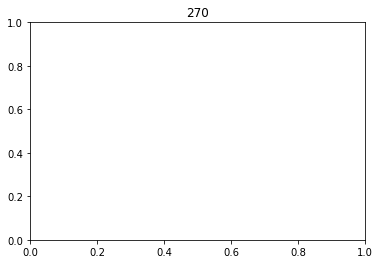

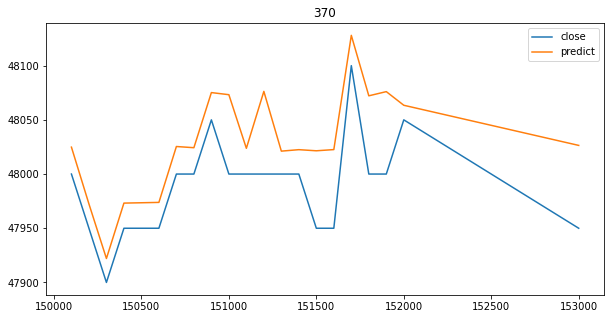

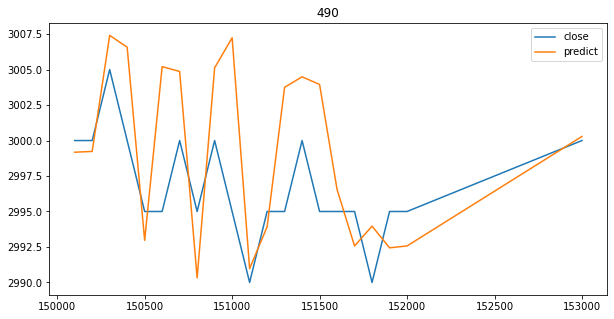

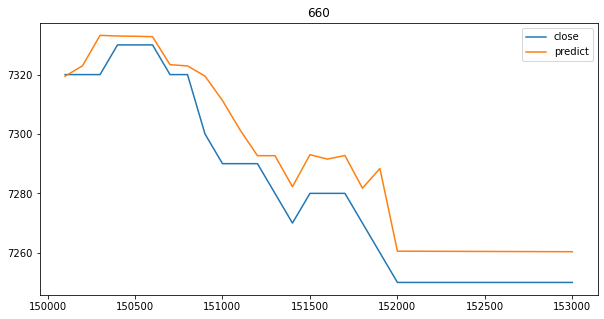

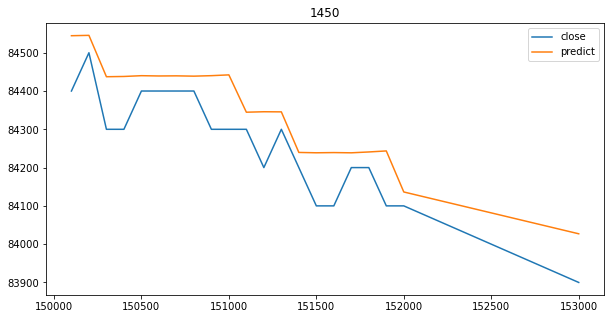

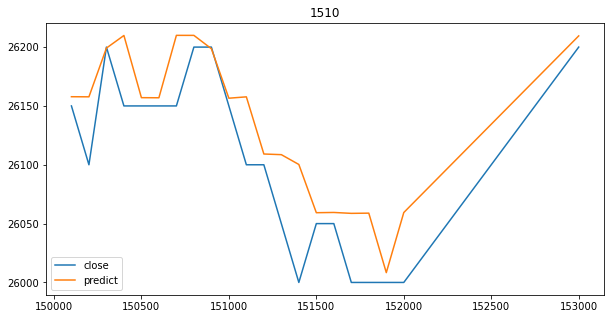

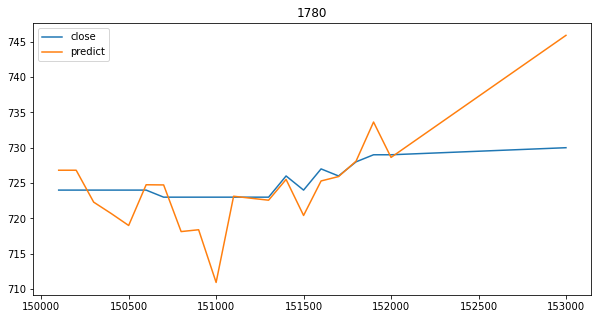

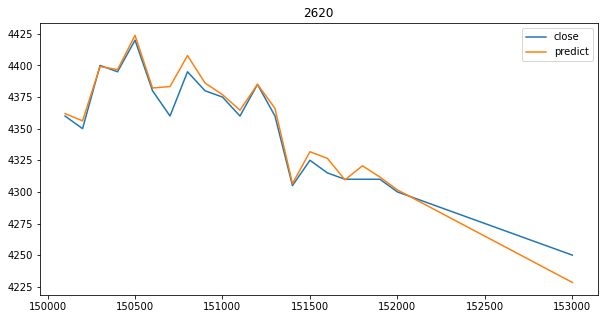

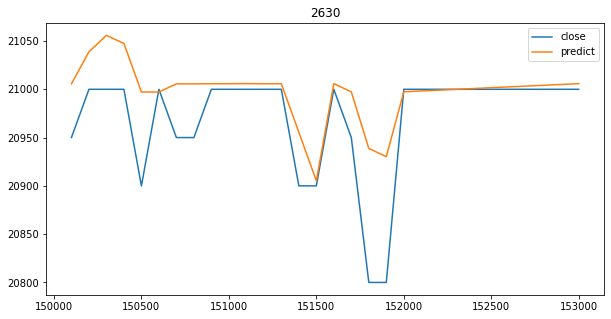

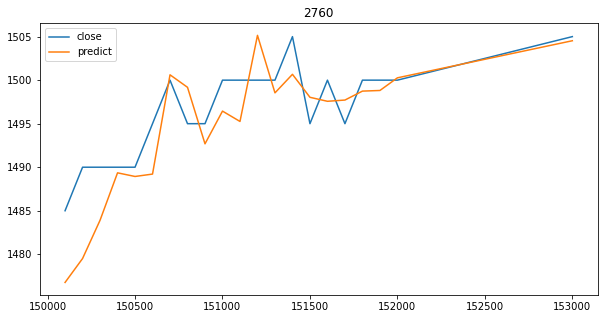

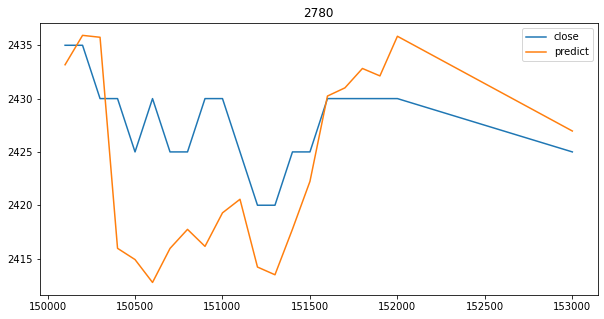

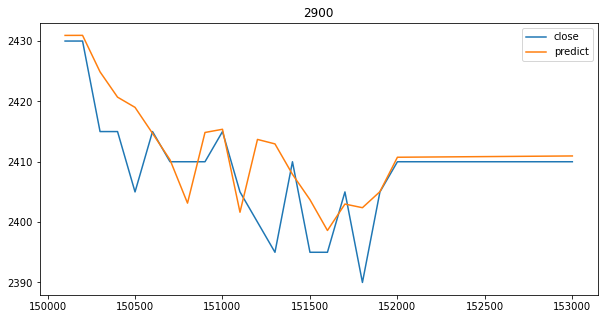

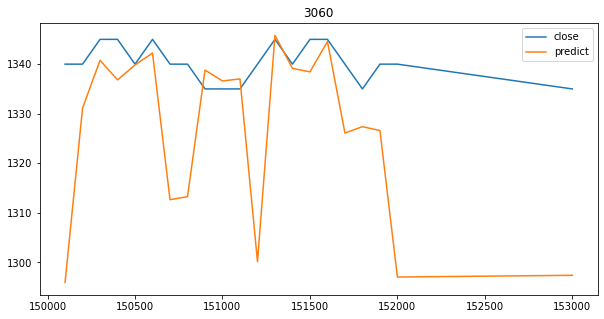

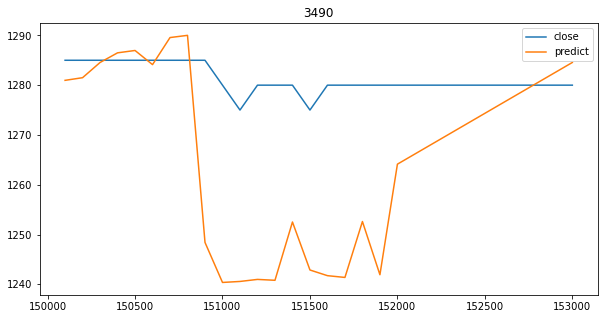

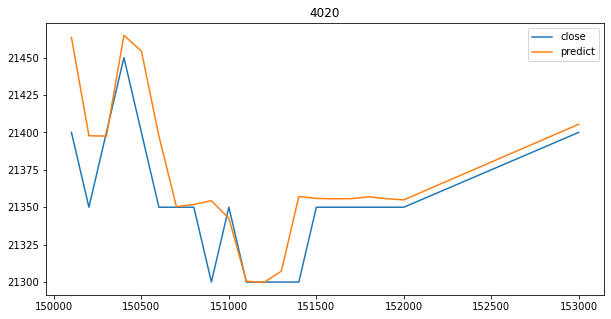

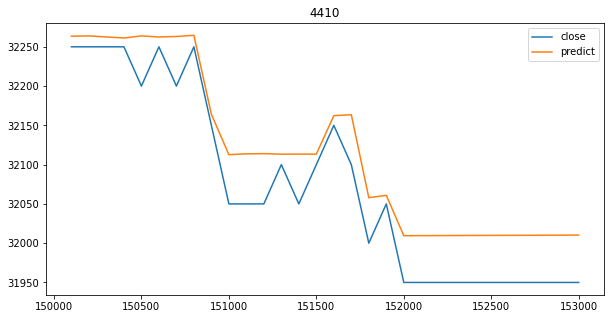

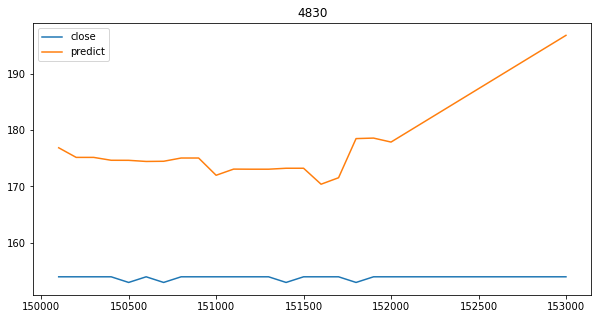

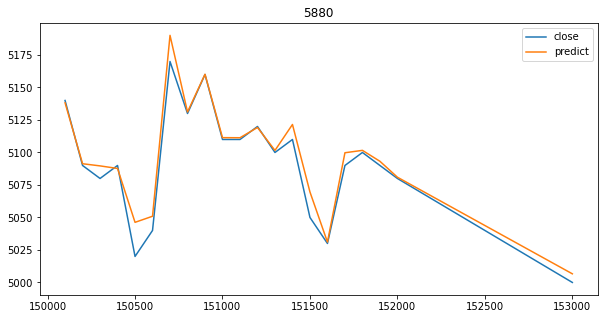

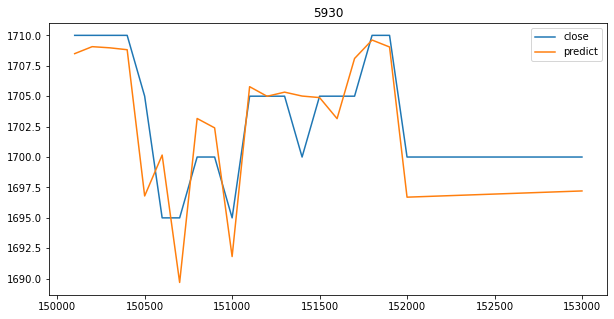

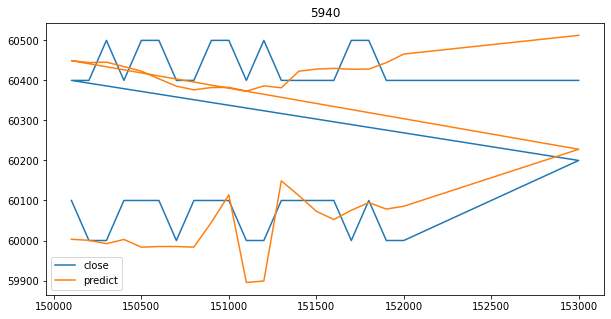

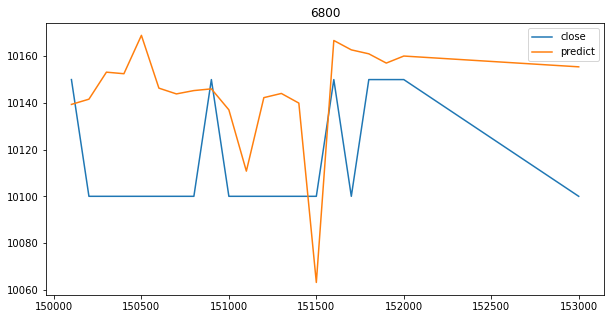

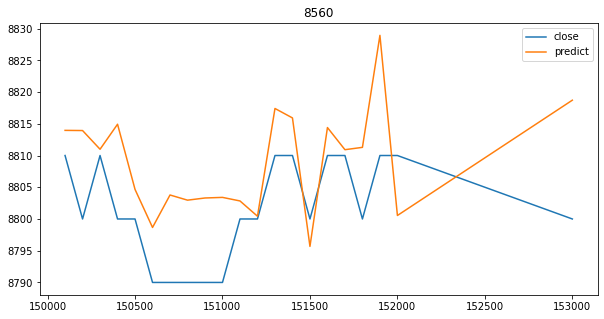

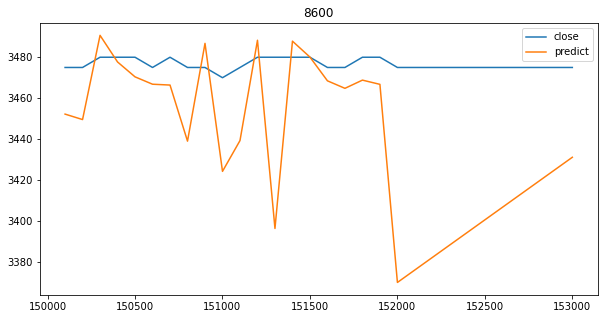

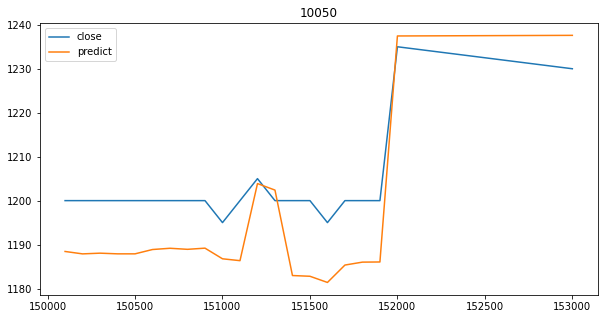

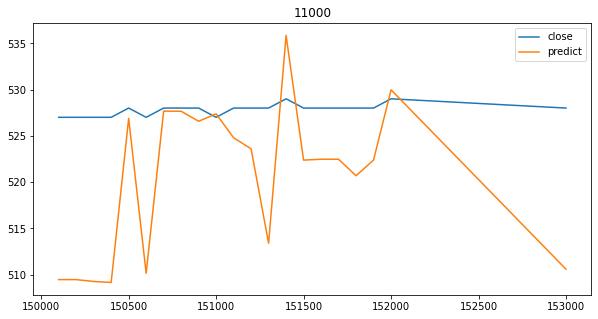

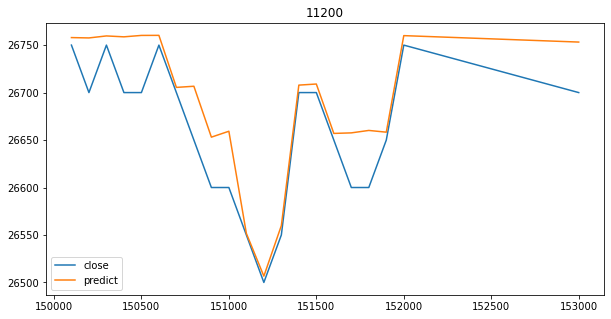

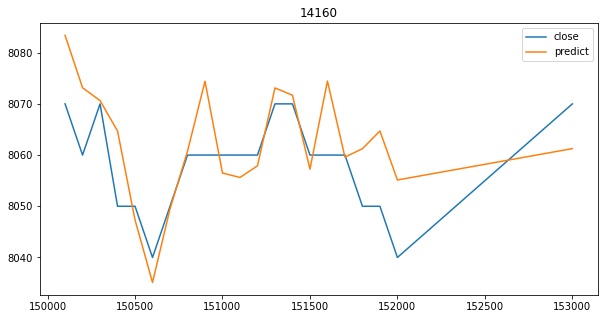

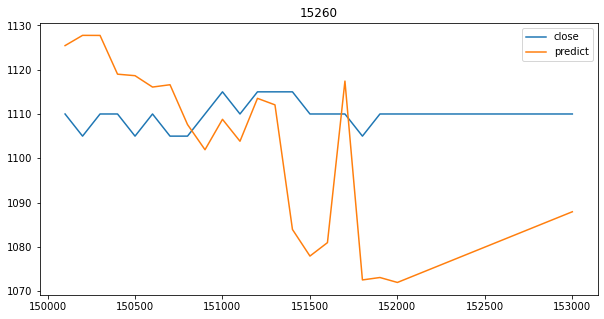

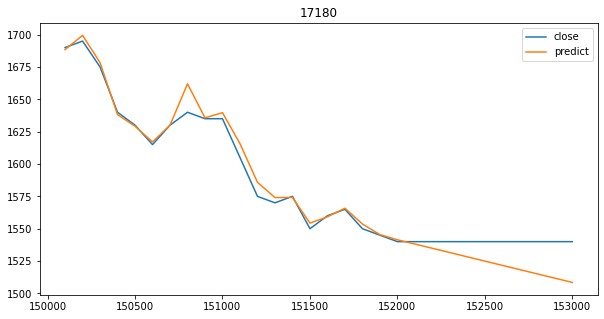

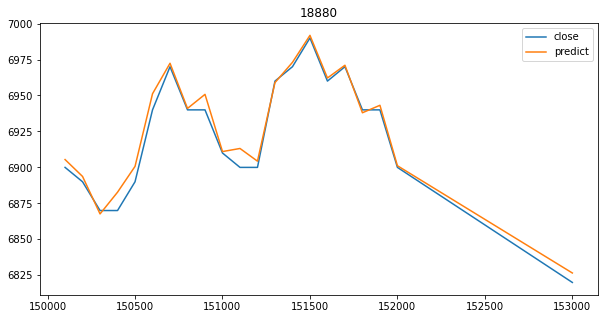

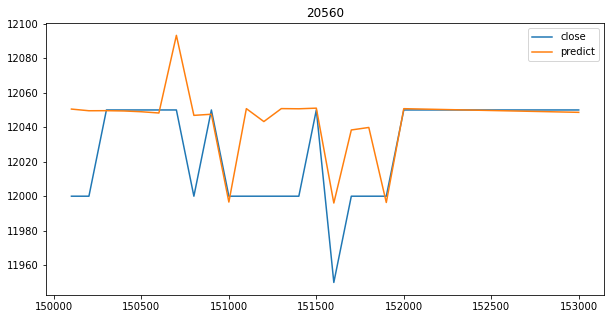

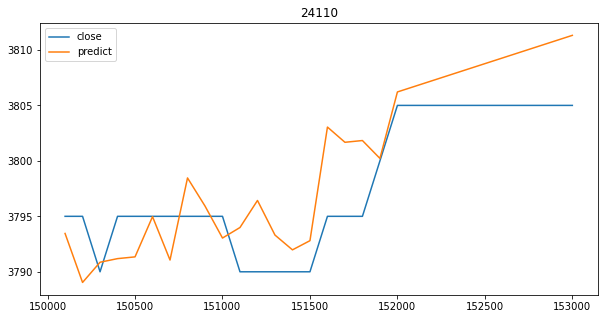

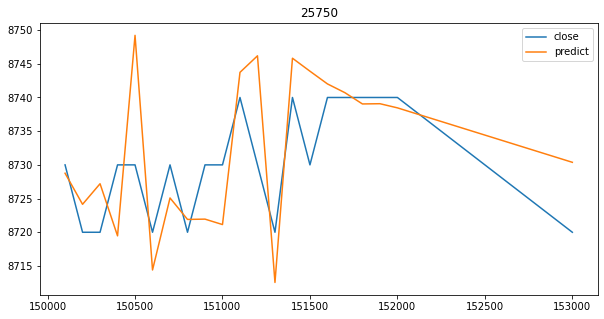

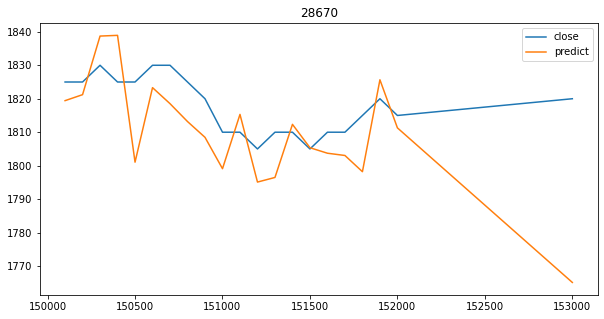

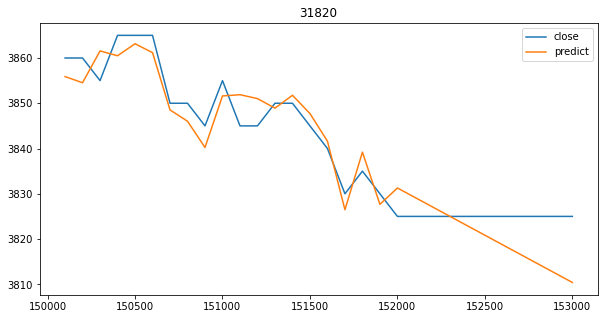

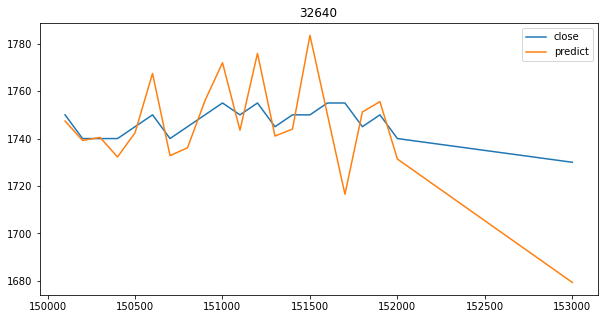

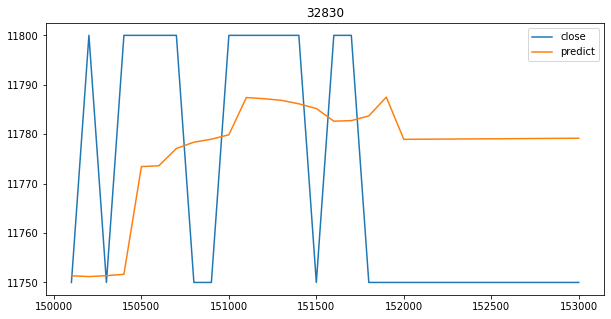

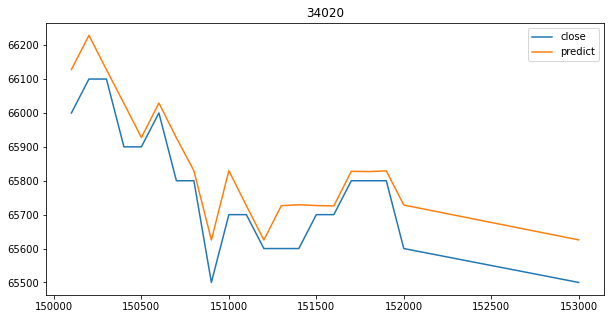

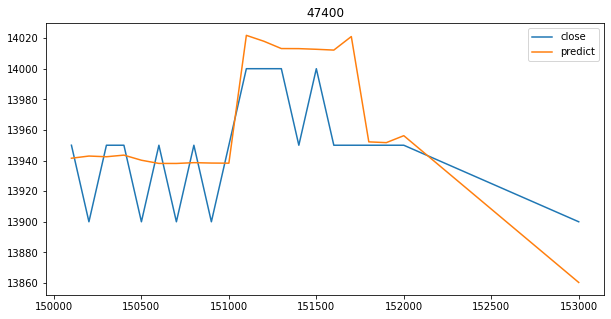

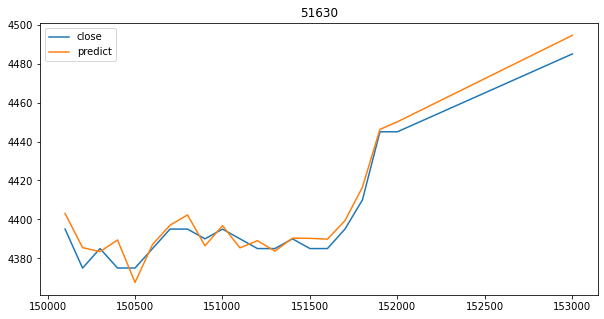

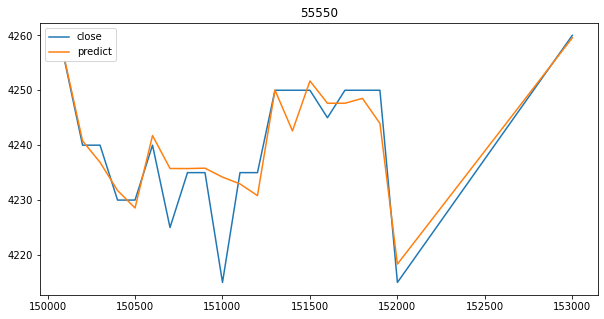

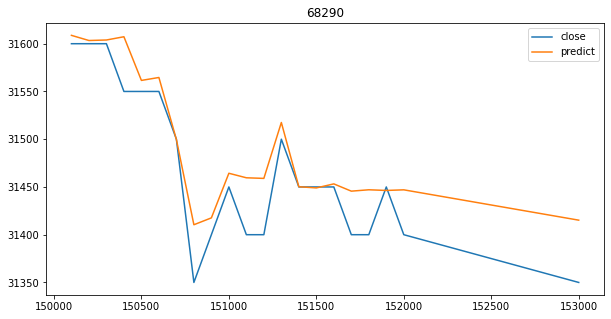

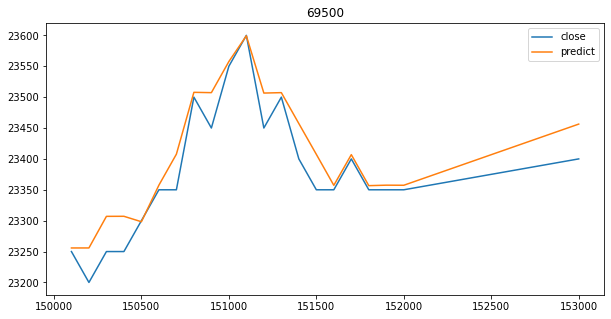

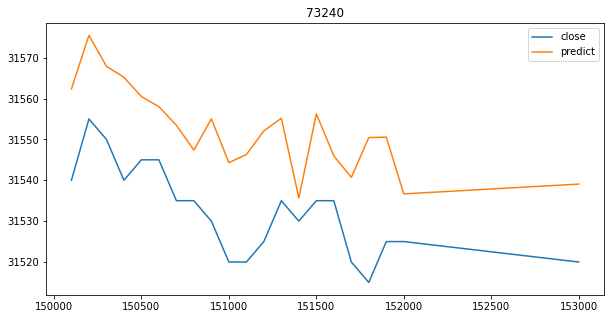

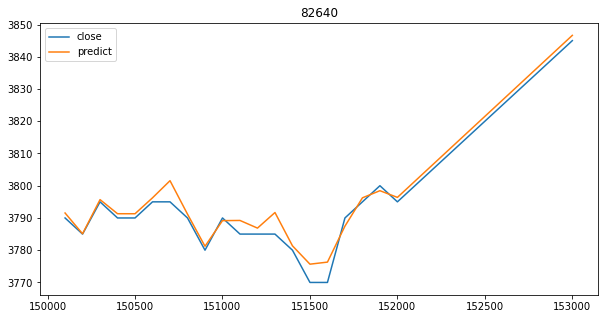

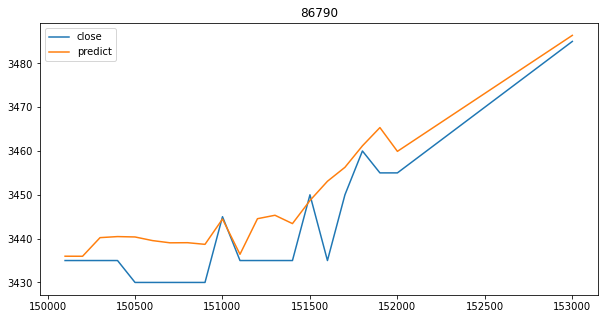

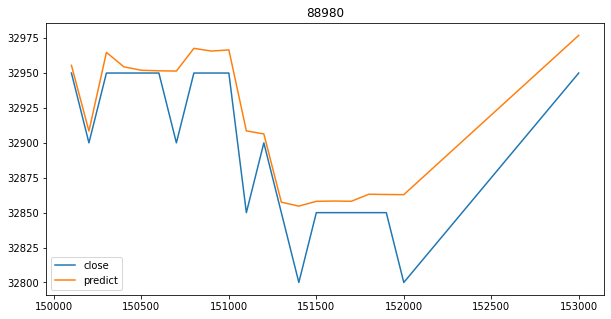

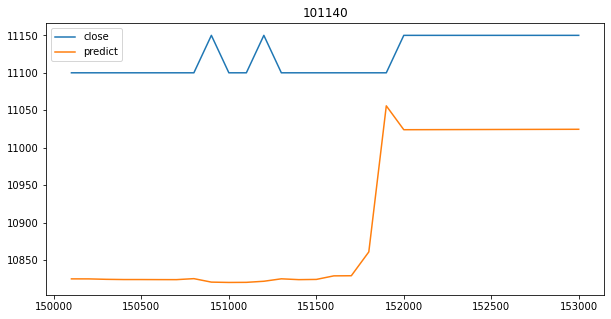

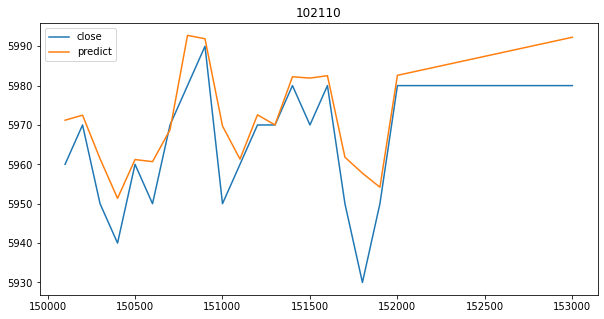

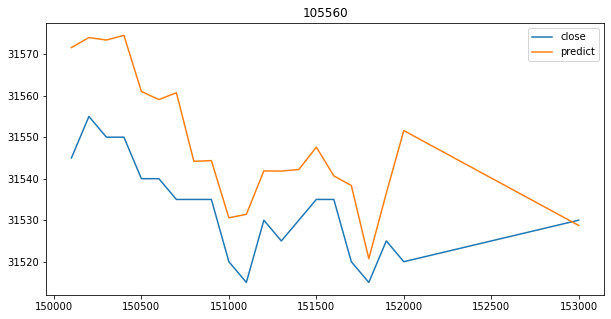

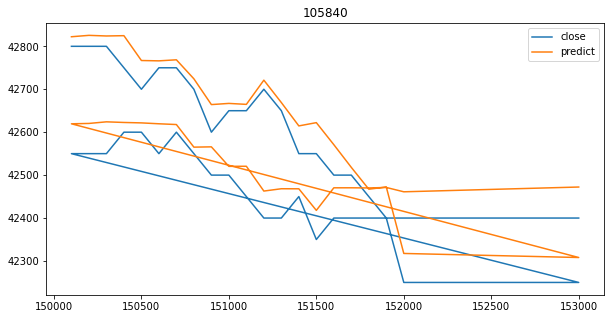

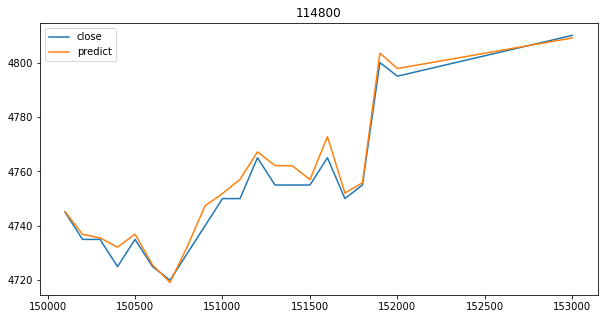

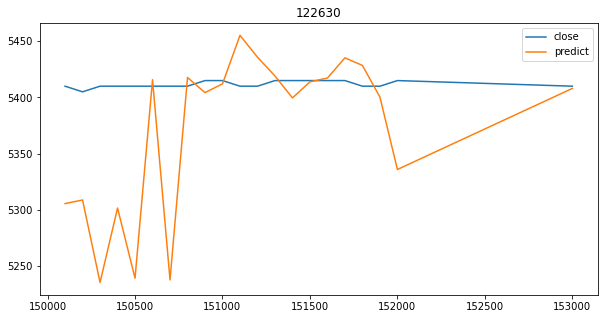

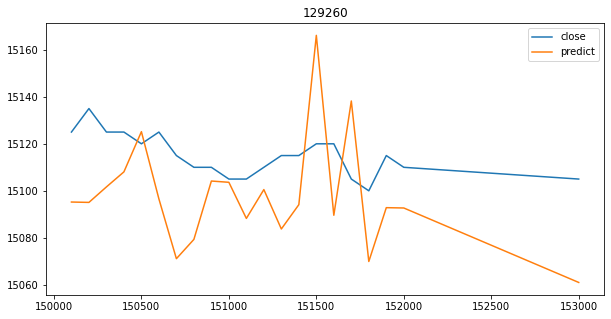

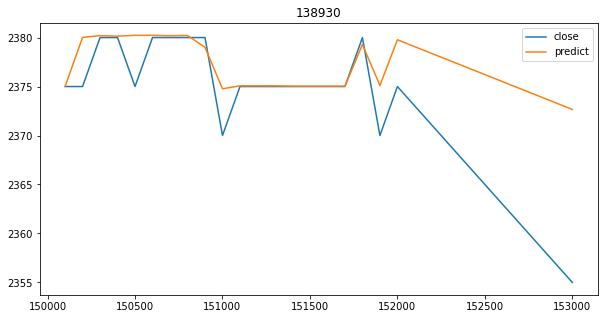

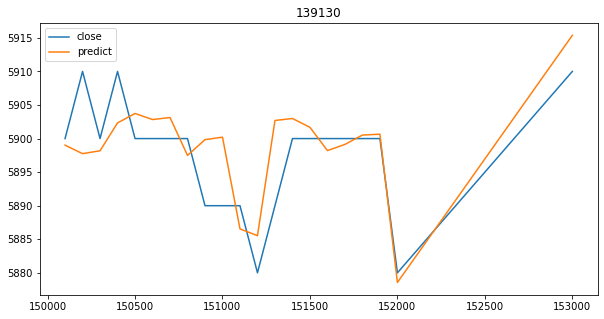

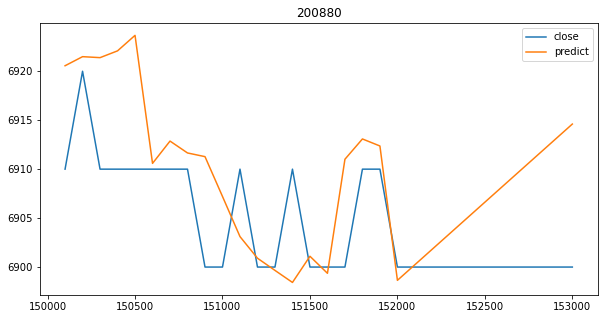

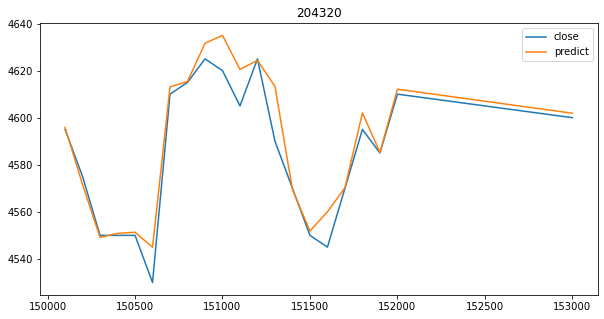

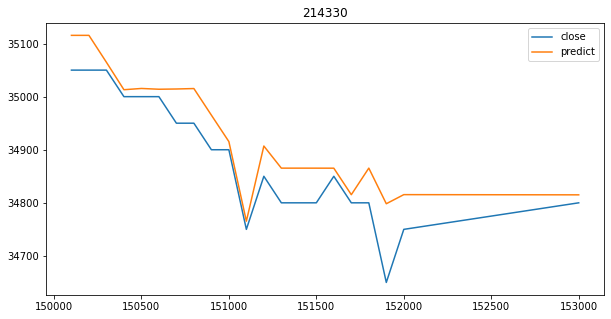

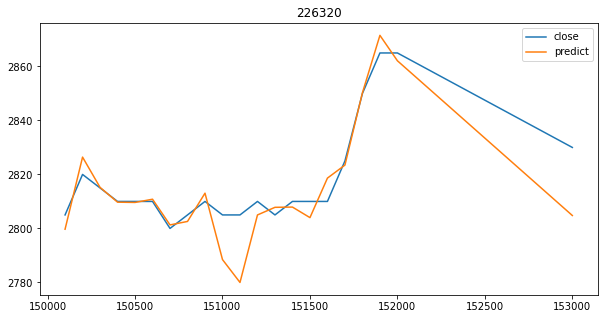

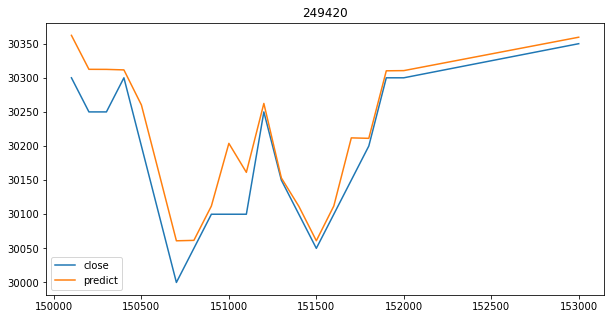

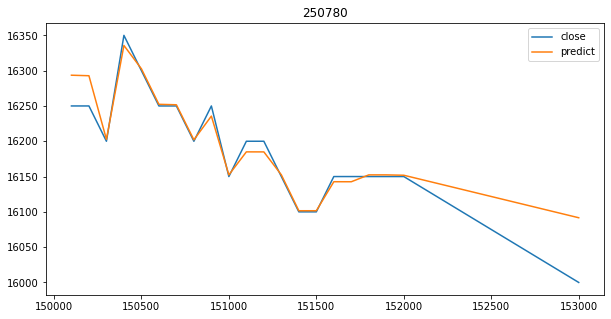

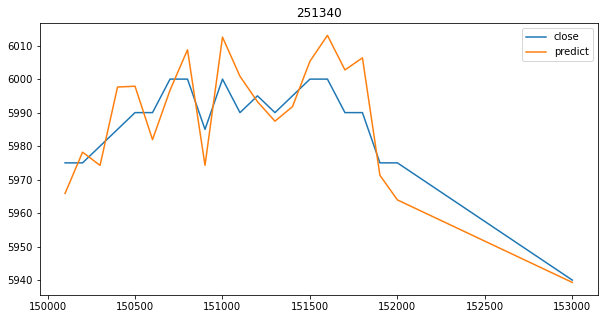

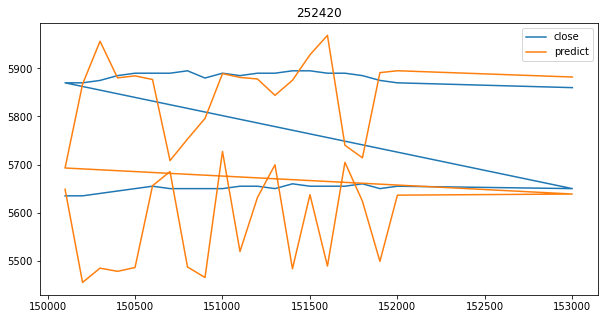

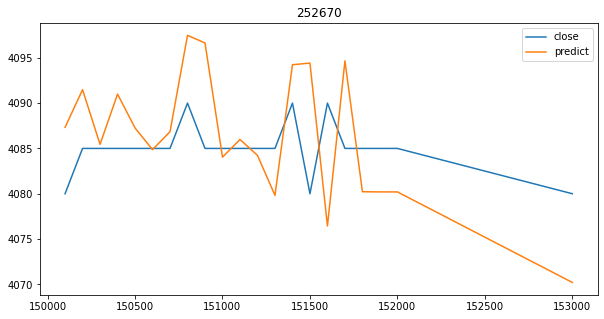

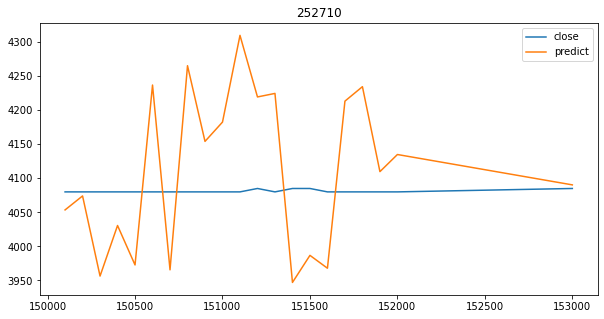

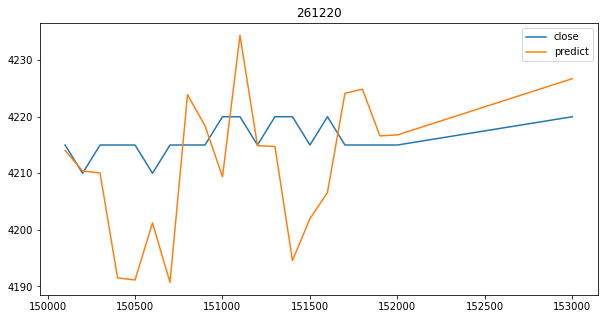

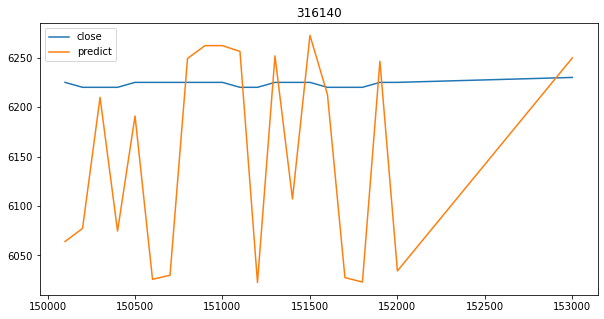

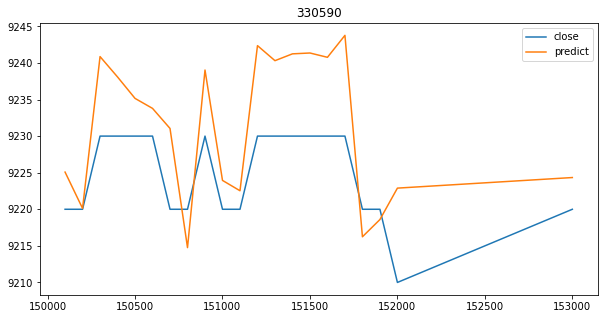

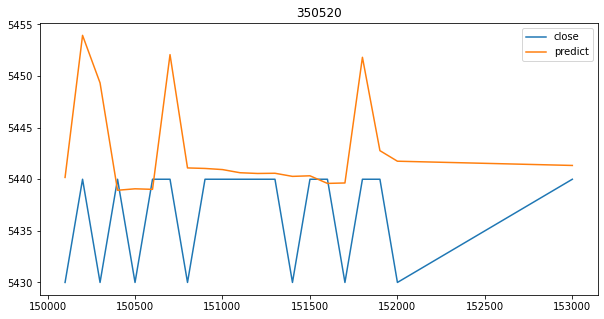

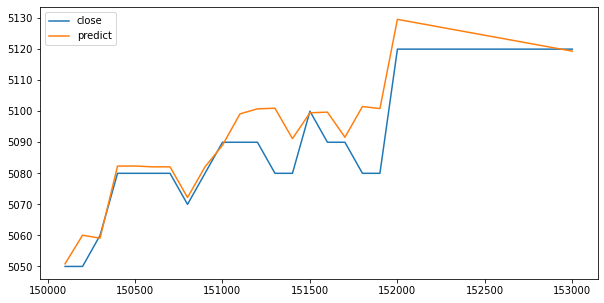

In [60]:
import matplotlib.pyplot as plt

%matplotlib inline

tempCodes = finalResult.drop_duplicates(['shcode'])
for code in tempCodes['shcode']:
    #print(code)
    plt.title(code)
    plt.figure(figsize=(10,5))
    plt.plot(finalResult.time[finalResult.shcode == code], finalResult.close[finalResult.shcode == code], label = "close")
    plt.plot(finalResult.time[finalResult.shcode == code], finalResult.PREDICT[finalResult.shcode == code], label = "predict")
    plt.legend(loc=0)
    
# plt.figure(figsize=(10,5))
# plt.plot(finalResult["time"], finalResult.close, label = "closee")
# plt.plot(finalResult["time"], finalResult.PREDICT, label = "predict")
# plt.legend(loc=0)